In [22]:
#import libraries
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

In [23]:
classes= 43
data = []
labels = []

cur_path = os.getcwd()#to get current directory

classs = { 1:"Speed limit (20km/h)",
    2:"Speed limit (30km/h)",
    3:"Speed limit (50km/h)",
    4:"Speed limit (60km/h)",
    5:"Speed limit (70km/h)",
    6:"Speed limit (80km/h)",
    7:"End of speed limit (80km/h)",
    8:"Speed limit (100km/h)",
    9:"Speed limit (120km/h)",
    10:"No passing",
    11:"No passing veh over 3.5 tons",
    12:"Right-of-way at intersection",
    13:"Priority road",
    14:"Yield",
    15:"Stop",
    16:"No vehicles",
    17:"Veh > 3.5 tons prohibited",
    18:"No entry",
    19:"General caution",
    20:"Dangerous curve left",
    21:"Dangerous curve right",
    22:"Double curve",
    23:"Bumpy road",
    24:"Slippery road",
    25:"Road narrows on the right",
    26:"Road work",
    27:"Traffic signals",
    28:"Pedestrians",
    29:"Children crossing",
    30:"Bicycles crossing",
    31:"Beware of ice/snow",
    32:"Wild animals crossing",
    33:"End speed + passing limits",
    34:"Turn right ahead",
    35:"Turn left ahead",
    36:"Ahead only",
    37:"Go straight or right",
    38:"Go straight or left",
    39:"Keep right",
    40:"Keep left",
    41:"Roundabout mandatory",
    42:"End of no passing",
    43:"End no passing veh > 3.5 tons" }


print('Obtaining Images & its labels.....')

for i in range(classes):
    path = os.path.join(cur_path,'C:\\AI(ml&dl)\\DATASETS\\Taffic_signals_rec\\code\\dataset\\Train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path+'//'+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            print('{0} loaded'.format(a))
        except:
            print('Error Loading Image')
            
print('Dataset Loaded')
        
        

Obtaining Images & its labels.....
00000_00000_00000.png loaded
00000_00000_00001.png loaded
00000_00000_00002.png loaded
00000_00000_00003.png loaded
00000_00000_00004.png loaded
00000_00000_00005.png loaded
00000_00000_00006.png loaded
00000_00000_00007.png loaded
00000_00000_00008.png loaded
00000_00000_00009.png loaded
00000_00000_00010.png loaded
00000_00000_00011.png loaded
00000_00000_00012.png loaded
00000_00000_00013.png loaded
00000_00000_00014.png loaded
00000_00000_00015.png loaded
00000_00000_00016.png loaded
00000_00000_00017.png loaded
00000_00000_00018.png loaded
00000_00000_00019.png loaded
00000_00000_00020.png loaded
00000_00000_00021.png loaded
00000_00000_00022.png loaded
00000_00000_00023.png loaded
00000_00000_00024.png loaded
00000_00000_00025.png loaded
00000_00000_00026.png loaded
00000_00000_00027.png loaded
00000_00000_00028.png loaded
00000_00000_00029.png loaded
00000_00001_00000.png loaded
00000_00001_00001.png loaded
00000_00001_00002.png loaded
00000_00

In [24]:
data = np.array(data)
labels = np.array(labels)

print('data_shape',data.shape,'labels_shape',labels.shape)

X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size = 0.2,random_state = 42)
print('X_train',X_train.shape,
     'X_test',X_test.shape,
     'y_train',y_train.shape,
     'y_test',y_test.shape)

y_train = to_categorical(y_train,43)
y_test =  to_categorical(y_test,43)

data_shape (38883, 30, 30, 3) labels_shape (38883,)
X_train (31106, 30, 30, 3) X_test (7777, 30, 30, 3) y_train (31106,) y_test (7777,)


In [25]:
model = Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])



In [26]:
history = model.fit(X_train,y_train,batch_size=32,epochs = 5,validation_data = (X_test,y_test))
print('Initialized model')

Epoch 1/5
973/973 [==============================] - 80s 82ms/step - loss: 1.9858 - accuracy: 0.4971 - val_loss: 0.6919 - val_accuracy: 0.8426
Epoch 2/5
973/973 [==============================] - 81s 83ms/step - loss: 0.7349 - accuracy: 0.7862 - val_loss: 0.2699 - val_accuracy: 0.9289
Epoch 3/5
973/973 [==============================] - 84s 86ms/step - loss: 0.4631 - accuracy: 0.8664 - val_loss: 0.1619 - val_accuracy: 0.9565
Epoch 4/5
973/973 [==============================] - 89s 91ms/step - loss: 0.3762 - accuracy: 0.8910 - val_loss: 0.1584 - val_accuracy: 0.9569
Epoch 5/5
973/973 [==============================] - 84s 86ms/step - loss: 0.3264 - accuracy: 0.9087 - val_loss: 0.1201 - val_accuracy: 0.9645
Initialized model


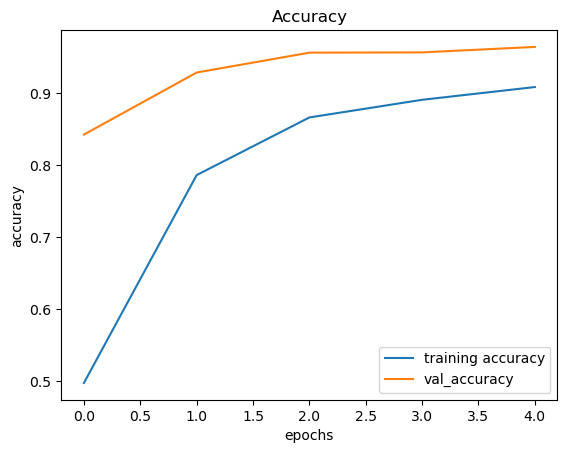

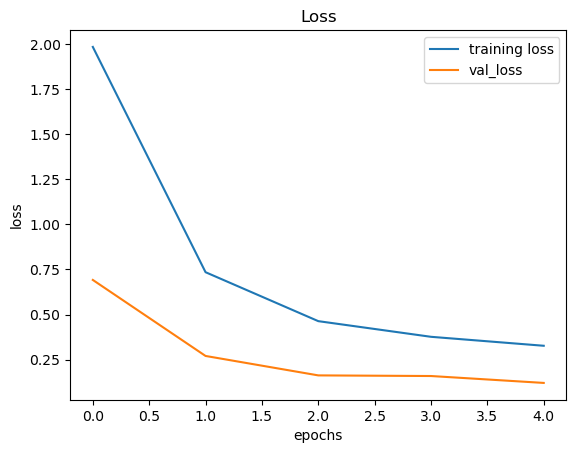

In [27]:
plt.figure(0)
plt.plot(history.history['accuracy'],label = 'training accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'],label = 'training loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')


In [28]:
label = list(classs.items())
print(label)

[(1, 'Speed limit (20km/h)'), (2, 'Speed limit (30km/h)'), (3, 'Speed limit (50km/h)'), (4, 'Speed limit (60km/h)'), (5, 'Speed limit (70km/h)'), (6, 'Speed limit (80km/h)'), (7, 'End of speed limit (80km/h)'), (8, 'Speed limit (100km/h)'), (9, 'Speed limit (120km/h)'), (10, 'No passing'), (11, 'No passing veh over 3.5 tons'), (12, 'Right-of-way at intersection'), (13, 'Priority road'), (14, 'Yield'), (15, 'Stop'), (16, 'No vehicles'), (17, 'Veh > 3.5 tons prohibited'), (18, 'No entry'), (19, 'General caution'), (20, 'Dangerous curve left'), (21, 'Dangerous curve right'), (22, 'Double curve'), (23, 'Bumpy road'), (24, 'Slippery road'), (25, 'Road narrows on the right'), (26, 'Road work'), (27, 'Traffic signals'), (28, 'Pedestrians'), (29, 'Children crossing'), (30, 'Bicycles crossing'), (31, 'Beware of ice/snow'), (32, 'Wild animals crossing'), (33, 'End speed + passing limits'), (34, 'Turn right ahead'), (35, 'Turn left ahead'), (36, 'Ahead only'), (37, 'Go straight or right'), (38, '

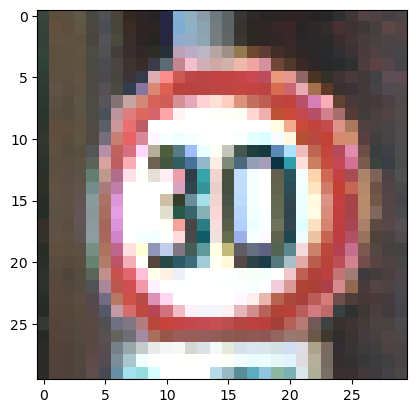

1/1 [==============================] - 0s 126ms/step
[[1.5393169e-06 9.9999583e-01 2.1881274e-08 7.2638724e-16 3.0469320e-08
  2.6597975e-06 9.3566868e-15 9.0630455e-13 1.0070948e-12 2.0939081e-23
  9.1622926e-20 3.0193948e-15 6.3682491e-17 2.1883293e-14 4.8411430e-17
  4.0176111e-19 7.3671621e-21 2.3762278e-19 3.1447408e-17 7.3797770e-25
  6.9397740e-18 3.3930585e-17 9.7447906e-23 1.4678053e-14 6.7928858e-19
  2.8761261e-14 1.5583971e-20 5.1759919e-23 4.7215893e-17 1.6344227e-17
  1.2657181e-18 7.4583137e-17 1.4022834e-19 1.0104553e-25 8.1054511e-22
  2.3839985e-20 2.6397883e-23 1.0602696e-18 2.6584308e-17 1.5331791e-18
  1.4851467e-14 1.8114015e-22 4.5282561e-16]]
0.9999958
1
(2, 'Speed limit (30km/h)')


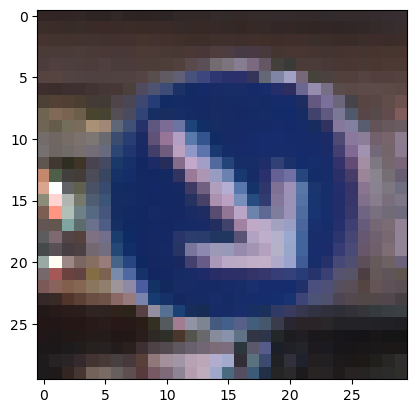

1/1 [==============================] - 0s 11ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.1818367e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.9949300e-27
  0.0000000e+00 1.7401315e-34 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
38
(39, 'Keep right')


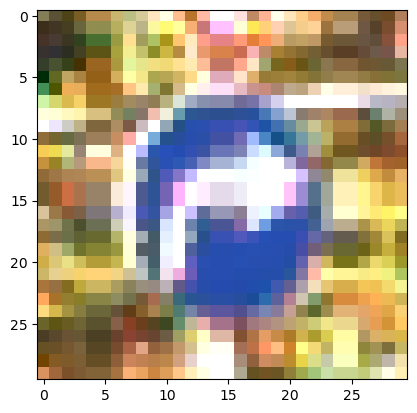

1/1 [==============================] - 0s 10ms/step
[[1.2601775e-34 5.6180887e-35 4.7318690e-32 4.6110255e-22 4.8583004e-37
  3.2315494e-31 0.0000000e+00 0.0000000e+00 5.0690293e-31 1.4077984e-20
  4.7272814e-19 7.6211419e-29 1.2851992e-26 2.2475567e-25 5.6843433e-32
  1.2423967e-35 1.5800394e-32 7.2050687e-30 0.0000000e+00 2.2546818e-27
  1.1780093e-30 4.5934634e-32 0.0000000e+00 1.2100831e-30 0.0000000e+00
  7.0137669e-32 1.2374314e-33 0.0000000e+00 2.9365096e-36 6.1853194e-21
  3.7987344e-36 8.2110238e-35 0.0000000e+00 1.0000000e+00 7.9233379e-23
  2.0001808e-22 7.9261851e-29 1.4305274e-31 5.3278305e-28 4.2432297e-21
  2.3994347e-29 3.8275604e-38 0.0000000e+00]]
1.0
33
(34, 'Turn right ahead')


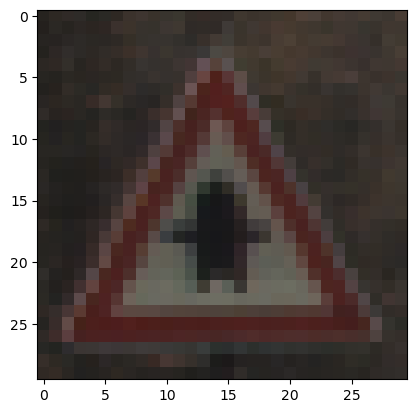

1/1 [==============================] - 0s 21ms/step
[[4.5415971e-18 2.1822715e-15 3.4944124e-14 1.6964935e-12 2.2774522e-21
  4.8251828e-14 2.6110386e-16 1.0288819e-18 7.9608105e-19 1.4364499e-18
  7.2622429e-18 9.9998987e-01 1.5676240e-12 1.6550610e-17 5.1837273e-15
  2.1760873e-22 8.7368140e-17 4.9918137e-18 7.7429653e-15 2.7545500e-14
  4.9222215e-13 3.4646185e-08 5.9130332e-21 1.5538270e-11 3.6844296e-13
  5.0764410e-11 3.8219075e-14 1.1007609e-08 3.9619499e-09 2.1837927e-10
  1.0128532e-05 1.7335928e-13 5.1547237e-14 6.6917686e-19 2.5721191e-15
  8.1208857e-20 2.4945894e-24 2.1254555e-18 2.6670603e-16 3.2059661e-23
  3.6855695e-16 3.0860072e-15 3.7575278e-17]]
0.99998987
11
(12, 'Right-of-way at intersection')


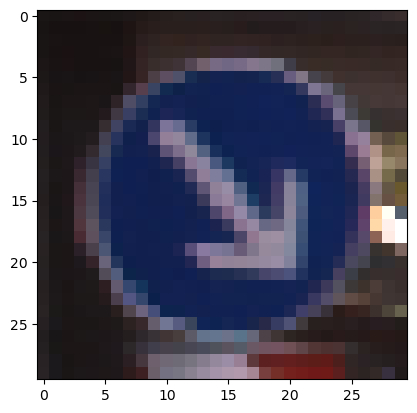

1/1 [==============================] - 0s 26ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 6.4459326e-37 0.0000000e+00
  3.1290718e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 3.7031771e-33 4.4885876e-36 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 3.0926507e-37 0.0000000e+00
  2.0227720e-28 0.0000000e+00 0.0000000e+00 6.8742053e-38 0.0000000e+00
  9.2452946e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.3714097e-37
  0.0000000e+00 5.7900174e-35 0.0000000e+00 0.0000000e+00 4.7704976e-22
  0.0000000e+00 2.2978525e-28 0.0000000e+00 1.0000000e+00 0.0000000e+00
  2.5439226e-32 0.0000000e+00 0.0000000e+00]]
1.0
38
(39, 'Keep right')


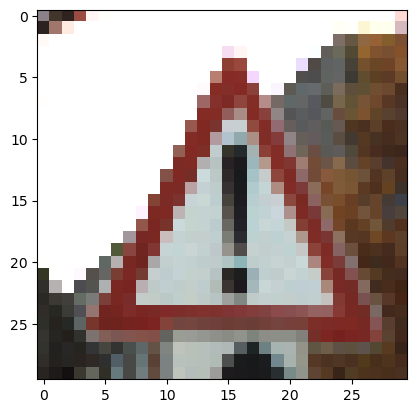

1/1 [==============================] - 0s 21ms/step
[[4.86736930e-38 3.92653029e-22 9.77471924e-32 0.00000000e+00
  4.98653153e-27 2.95054160e-31 0.00000000e+00 1.55705990e-36
  1.99785593e-36 2.03926411e-38 2.58013674e-36 8.26710925e-24
  1.37781469e-24 1.43080822e-35 6.61515577e-28 5.26426770e-30
  1.82758198e-36 1.21944896e-29 1.00000000e+00 1.30341033e-30
  1.45620193e-30 7.56573691e-27 7.60100454e-26 1.32615703e-27
  1.89937274e-18 2.15004330e-22 2.43613155e-15 2.40119079e-12
  1.95908141e-34 2.91038571e-25 2.48835862e-33 1.49625455e-31
  3.50236955e-32 0.00000000e+00 3.07910002e-38 0.00000000e+00
  4.08816129e-32 7.75166158e-33 1.82695832e-32 0.00000000e+00
  1.81416770e-30 0.00000000e+00 4.19342444e-37]]
1.0
18
(19, 'General caution')


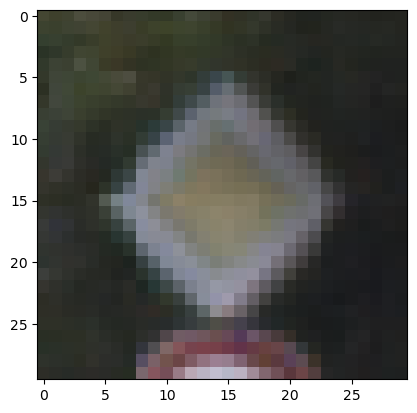

1/1 [==============================] - 0s 24ms/step
[[6.75085259e-13 1.94486516e-09 1.61807318e-10 3.27715144e-09
  8.50407467e-10 9.85701490e-07 1.40010406e-10 1.46119408e-10
  6.06257961e-11 9.17033172e-10 3.86567267e-09 2.85094864e-10
  9.99997973e-01 1.03779520e-10 3.07777692e-09 5.37341919e-07
  3.70031983e-09 3.98071215e-10 1.98427252e-09 8.11542860e-15
  5.80562820e-10 1.37829863e-12 3.32306484e-15 1.66121110e-12
  1.84212780e-12 2.59303647e-07 1.39764529e-08 4.83118265e-13
  1.84680331e-12 2.07713402e-08 4.58904995e-13 6.98679959e-12
  6.20828970e-08 2.29927188e-10 2.16161776e-11 1.47813140e-07
  3.95199695e-09 1.51153412e-09 1.21263115e-08 9.29005662e-15
  2.31132216e-08 3.95454884e-11 1.26456345e-09]]
0.999998
12
(13, 'Priority road')


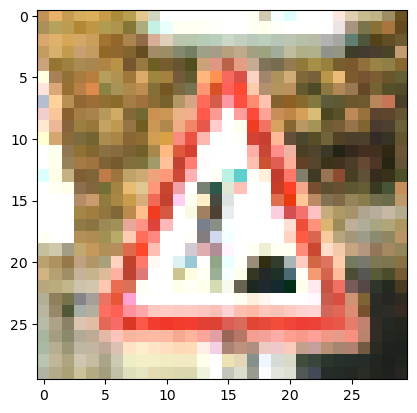

1/1 [==============================] - 0s 9ms/step
[[0.0000000e+00 4.9405704e-30 1.6503125e-31 2.1362261e-30 1.3565650e-35
  8.8190975e-27 1.6413111e-29 0.0000000e+00 0.0000000e+00 0.0000000e+00
  7.3008799e-38 1.2361966e-31 7.4043797e-22 1.4470461e-33 2.2764959e-34
  0.0000000e+00 0.0000000e+00 1.6964787e-34 4.9852435e-25 0.0000000e+00
  2.5078665e-25 2.3403216e-30 2.1249615e-30 1.0362300e-34 2.0484933e-25
  1.0000000e+00 5.6404048e-26 3.4897836e-30 9.5062651e-34 1.7751620e-28
  0.0000000e+00 1.1456674e-28 1.0607676e-33 0.0000000e+00 0.0000000e+00
  5.2958743e-36 3.1480589e-22 0.0000000e+00 7.1685228e-38 0.0000000e+00
  0.0000000e+00 0.0000000e+00 3.6266466e-35]]
1.0
25
(26, 'Road work')


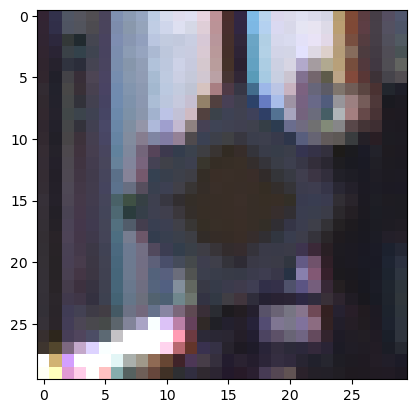

1/1 [==============================] - 0s 21ms/step
[[2.1171484e-06 2.1671933e-04 4.5613508e-04 3.2721546e-02 3.7382867e-07
  1.2017187e-02 1.2531955e-05 1.7919921e-06 7.2605658e-06 8.6536029e-06
  1.4356869e-04 5.9372233e-03 5.7766861e-01 6.2055578e-03 4.3131236e-05
  1.7161780e-06 7.8128924e-06 1.2991471e-04 4.5830195e-05 5.5414097e-07
  1.4474794e-03 1.4086234e-03 1.4051598e-05 5.8427756e-04 4.0212472e-05
  9.0287313e-02 7.5066491e-05 6.3123011e-06 4.3320558e-03 5.0028585e-02
  7.3057199e-03 6.7446410e-04 1.2496635e-04 7.7247641e-06 3.4839599e-03
  7.5248472e-04 4.1925363e-05 2.7808979e-05 1.9856067e-01 2.8215700e-07
  5.0327689e-03 7.7434543e-06 1.2728752e-04]]
0.5776686
12
(13, 'Priority road')


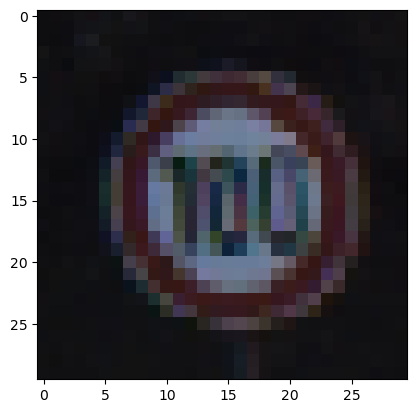

1/1 [==============================] - 0s 25ms/step
[[2.7011800e-18 2.5885030e-12 4.8985555e-13 9.2815432e-21 1.5940917e-12
  1.3288573e-10 5.5357494e-23 9.9999976e-01 2.1419748e-07 8.1468437e-20
  1.1390932e-17 5.6158107e-22 1.3899438e-19 4.2310071e-22 1.5986752e-26
  1.6071189e-19 1.5097255e-19 3.3246392e-25 2.7993276e-25 4.6139883e-26
  8.6931486e-25 5.5844346e-20 4.2318205e-34 3.3554028e-21 1.1599843e-23
  1.9479808e-23 6.2012652e-21 2.8954325e-27 9.0407782e-27 1.0726622e-24
  2.0992908e-23 1.2586583e-20 3.9746470e-30 4.1565999e-23 7.1752875e-28
  1.4491525e-23 3.8021905e-25 3.4884326e-26 1.5446993e-23 2.3006171e-26
  2.6941672e-14 2.3016361e-33 3.6449794e-21]]
0.99999976
7
(8, 'Speed limit (100km/h)')


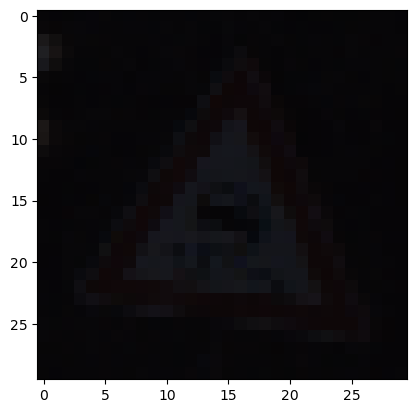

1/1 [==============================] - 0s 25ms/step
[[6.4010732e-07 1.2548097e-06 9.2196778e-06 6.4752676e-05 4.5072579e-07
  1.1120746e-05 9.6719246e-09 3.5418166e-06 3.1101459e-05 1.0011131e-03
  5.6453224e-04 8.9982664e-03 8.4472667e-05 9.0840786e-07 1.6186941e-06
  5.0555639e-07 9.9400359e-06 9.5312025e-06 2.5556907e-05 5.8233678e-02
  7.5512260e-02 1.1286145e-02 1.1109145e-06 7.7301288e-01 3.9859785e-04
  1.5508656e-04 2.8689250e-05 1.5968010e-03 5.0183176e-04 7.4248663e-03
  1.8978812e-02 4.1978680e-02 3.4887898e-07 2.2608461e-05 5.9426093e-06
  7.4607601e-07 8.8196288e-08 3.3247385e-08 1.7772987e-05 5.8307258e-08
  2.6450336e-06 1.6908989e-05 4.9424125e-06]]
0.7730129
23
(24, 'Slippery road')


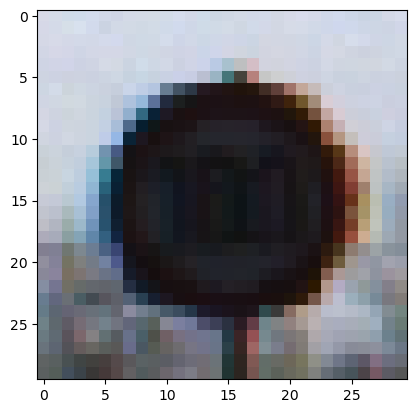

1/1 [==============================] - 0s 23ms/step
[[2.0244613e-04 2.0613179e-02 1.3303104e-02 1.6628705e-04 3.3454739e-02
  1.5015085e-01 2.9520866e-06 2.6857328e-01 5.1260018e-01 5.1657124e-05
  1.4714805e-04 4.2606618e-07 8.5434986e-06 6.0991024e-05 4.3186425e-05
  2.6913555e-04 1.2358977e-05 8.1215374e-05 1.9374145e-06 2.1741087e-07
  1.6590529e-06 3.1028773e-07 1.1814845e-09 1.6838587e-06 4.0621219e-07
  5.2891091e-06 5.3292956e-06 4.8380631e-08 2.5518689e-08 5.4745561e-07
  3.3338239e-08 3.8473395e-06 7.6742919e-07 1.6656608e-06 8.8784198e-08
  2.2578208e-06 9.4949801e-06 1.8594187e-07 2.8621448e-06 1.2259267e-07
  2.1611074e-04 1.0519430e-09 3.3556996e-06]]
0.5126002
8
(9, 'Speed limit (120km/h)')


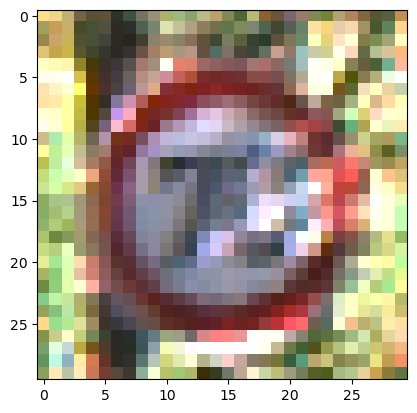

1/1 [==============================] - 0s 26ms/step
[[1.17937507e-10 2.25295196e-03 7.33726253e-08 5.89805304e-15
  9.97708440e-01 3.78003606e-05 9.70298128e-14 1.85601995e-13
  2.33356171e-14 7.44841069e-17 2.67068721e-16 1.76036628e-18
  5.76046372e-13 6.39289012e-12 6.22290237e-14 1.13242456e-12
  4.55704398e-19 1.40005696e-13 3.60093899e-12 3.29119268e-19
  1.29496388e-14 1.01540804e-17 1.90681727e-19 7.57523958e-16
  5.11139593e-14 7.14986243e-07 1.21652512e-13 2.72317354e-17
  7.75793077e-23 6.14448694e-20 6.30865994e-26 1.00032983e-16
  4.42854716e-19 2.20827836e-20 2.91286547e-20 7.39293490e-15
  9.21700227e-09 1.56793362e-23 5.92913269e-17 2.40051433e-19
  1.28817893e-15 3.65644634e-23 4.12575693e-16]]
0.99770844
4
(5, 'Speed limit (70km/h)')


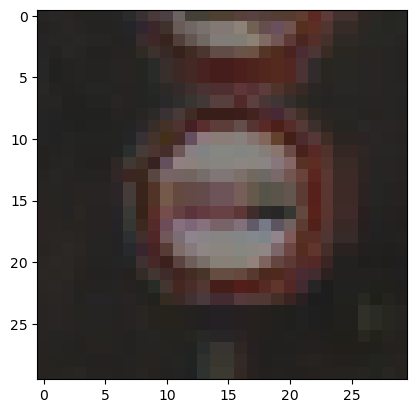

1/1 [==============================] - 0s 19ms/step
[[1.0027524e-12 1.1204630e-10 8.0343343e-10 7.7287223e-07 1.2572189e-10
  3.5596937e-08 8.3834310e-19 1.5542335e-09 4.5068016e-10 9.8576331e-01
  1.4225021e-02 1.0550769e-12 6.2774796e-10 3.5299361e-09 3.5089538e-08
  1.1346621e-07 1.0674098e-05 5.0827342e-11 2.3335056e-13 2.2099035e-10
  2.1054023e-09 2.9930058e-14 5.2457819e-17 8.7497005e-09 1.0684784e-14
  4.2484176e-12 1.4197566e-11 1.7690778e-14 1.3632879e-14 1.5309583e-12
  1.6024951e-15 3.3646491e-12 1.1732842e-13 1.6825252e-09 5.8423826e-12
  6.4809375e-10 7.3362726e-11 1.2455654e-15 1.0426317e-12 9.2597930e-15
  1.7154465e-11 4.5760427e-11 5.9506493e-09]]
0.9857633
9
(10, 'No passing')


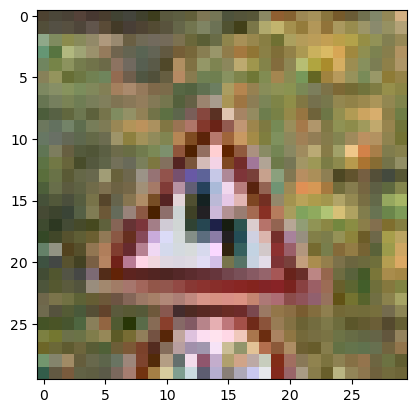

1/1 [==============================] - 0s 30ms/step
[[7.4628770e-15 4.0220059e-15 2.0595604e-14 1.1418789e-15 4.0480242e-20
  9.7103222e-15 1.5177572e-20 8.6492812e-19 2.4776839e-14 1.4740859e-16
  1.0662215e-15 6.1692161e-05 1.0633271e-12 5.9450659e-16 1.6506818e-11
  6.6065003e-22 6.0264987e-21 2.7664711e-11 3.5444341e-12 1.0358371e-07
  6.3524312e-06 1.3921377e-01 2.9722458e-10 1.9822329e-02 1.4047131e-04
  1.0162926e-05 2.5037068e-11 7.7215909e-06 2.5230923e-08 1.5746893e-03
  8.3077025e-01 8.3924383e-03 1.6056905e-20 1.2740359e-18 1.4112114e-14
  4.3930977e-21 1.9212512e-23 1.4208005e-20 2.8055500e-10 5.6300758e-22
  2.0519058e-15 1.3903438e-16 2.6444635e-17]]
0.83077025
30
(31, 'Beware of ice/snow')


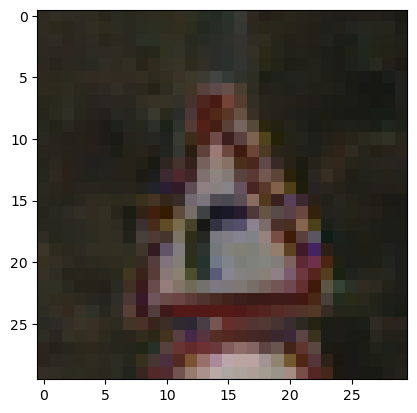

1/1 [==============================] - 0s 30ms/step
[[9.37090375e-19 1.62654562e-17 2.44228477e-16 5.51727192e-15
  3.66139271e-19 2.22057959e-17 1.86451357e-20 4.69907767e-20
  4.04109625e-16 2.62821297e-12 3.33071714e-15 4.04141165e-09
  6.33549506e-12 3.96893278e-20 1.88654333e-19 1.40350643e-19
  3.57592374e-14 1.85370222e-16 3.60681407e-12 4.21525662e-12
  9.99997854e-01 1.41016604e-12 3.83939061e-19 2.08668598e-06
  2.11590412e-09 8.77716441e-11 3.53948329e-11 3.34128836e-10
  5.48267387e-08 2.41273646e-12 5.03498770e-11 1.18118605e-11
  1.99300037e-16 6.95879504e-18 3.28995174e-17 1.99896970e-16
  2.95016075e-18 1.60859164e-22 5.00335713e-15 3.00728292e-24
  4.39749000e-17 4.17866818e-11 8.23475402e-12]]
0.99999785
20
(21, 'Dangerous curve right')


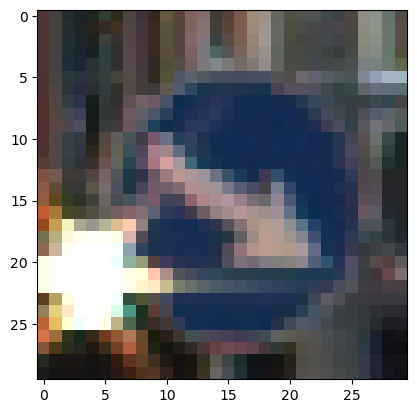

1/1 [==============================] - 0s 30ms/step
[[5.3342172e-35 2.8211121e-32 1.9754862e-34 4.3660027e-27 1.2120422e-37
  2.4171920e-30 0.0000000e+00 0.0000000e+00 4.2885051e-34 1.1143220e-37
  3.4031230e-37 6.2093446e-34 3.8880378e-26 5.3928161e-27 0.0000000e+00
  2.4812769e-34 3.9186574e-38 3.4943137e-37 2.3947060e-30 0.0000000e+00
  8.4424929e-23 3.9735654e-33 1.8043989e-33 3.2625401e-31 0.0000000e+00
  2.0320645e-24 1.5585657e-33 1.5438049e-37 1.0001691e-35 9.3043215e-25
  9.8143144e-34 1.2841962e-31 1.3157223e-33 2.6202933e-32 3.7560382e-14
  1.7695215e-30 6.3975546e-21 6.2805464e-35 1.0000000e+00 0.0000000e+00
  1.8184802e-27 0.0000000e+00 0.0000000e+00]]
1.0
38
(39, 'Keep right')


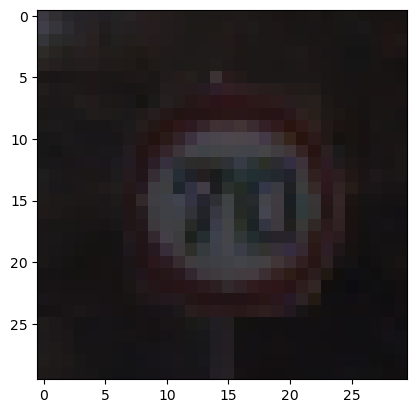

1/1 [==============================] - 0s 26ms/step
[[9.55287214e-06 1.64366420e-03 1.24596982e-05 3.61526059e-10
  9.97817874e-01 6.83612379e-05 1.66076514e-10 3.35626450e-04
  8.54356622e-05 3.51552174e-08 3.24777631e-07 3.45476113e-11
  7.98958979e-08 3.23532447e-07 1.75500645e-08 2.43762534e-05
  2.33239073e-09 6.00871033e-08 2.48197722e-07 6.10488771e-10
  1.76883327e-10 3.25353133e-10 6.91575790e-12 4.75412243e-09
  2.02751636e-07 9.12479425e-09 1.05164850e-06 1.76971396e-10
  1.28633744e-13 9.64045094e-11 1.04398342e-13 1.44929152e-10
  1.52163282e-11 2.63028732e-09 1.61594939e-11 1.09785905e-08
  3.95080626e-08 1.42053327e-10 4.33387132e-10 1.01606223e-09
  1.80813046e-07 1.61421047e-13 1.43403039e-10]]
0.9978179
4
(5, 'Speed limit (70km/h)')


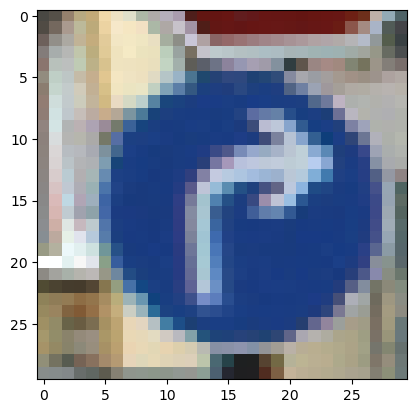

1/1 [==============================] - 0s 27ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.2811782e-37 0.0000000e+00
  2.7984998e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.9888007e-35
  1.0851419e-30 1.5380561e-37 2.2949607e-29 1.4913687e-34 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.1664599e-37
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 3.4931330e-34
  7.7878219e-18 1.6532761e-36 4.1312471e-37 0.0000000e+00 9.0719919e-24
  1.2788565e-33 0.0000000e+00 0.0000000e+00]]
1.0
33
(34, 'Turn right ahead')


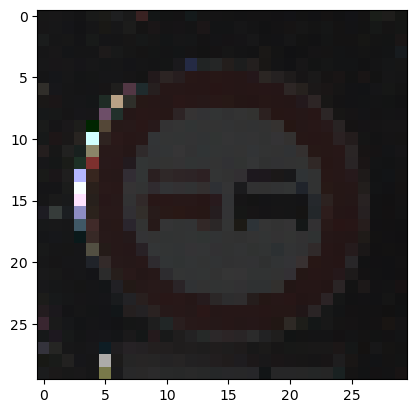

1/1 [==============================] - 0s 28ms/step
[[1.54769664e-09 1.57220512e-08 7.65270869e-08 6.60043997e-06
  8.79627216e-09 7.90045220e-08 2.14445229e-13 7.38553485e-09
  1.81062223e-08 9.98556197e-01 1.00281578e-03 8.10577827e-09
  5.43791884e-06 5.63216531e-07 2.27533015e-08 1.32395789e-05
  3.50562943e-04 2.12499511e-08 3.56700669e-09 2.63303332e-06
  3.26607142e-06 4.25308594e-10 3.81504203e-12 3.38971367e-05
  1.36402023e-09 2.50437218e-08 1.10905107e-08 8.66799188e-10
  4.03431555e-09 4.21247321e-08 5.25625987e-10 2.52100119e-09
  2.08193160e-08 1.49866779e-07 4.40283614e-08 2.02781257e-06
  1.22545085e-08 2.64898881e-10 5.09452480e-09 9.88905624e-11
  1.63290323e-07 2.19293852e-05 1.52726614e-07]]
0.9985562
9
(10, 'No passing')


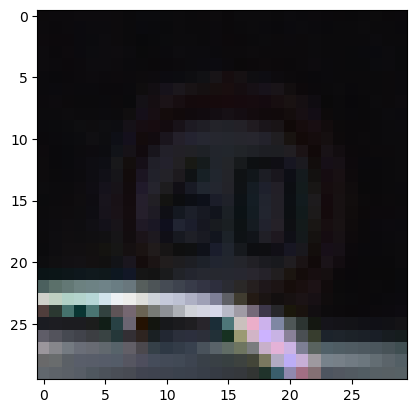

1/1 [==============================] - 0s 28ms/step
[[1.53682933e-07 1.79354856e-06 8.30897916e-05 9.96665061e-01
  2.52864059e-08 3.22048808e-03 2.69269094e-07 3.15262163e-08
  5.17509129e-08 6.59968009e-06 9.19211197e-06 8.27635631e-07
  3.43247848e-07 1.45181517e-07 2.18246328e-07 2.85246614e-07
  3.53809651e-06 4.62162753e-09 2.06607495e-10 3.37908673e-10
  1.40209352e-07 2.03368096e-08 1.07800407e-10 7.21594091e-08
  4.37179321e-11 5.54124767e-07 7.18412829e-10 2.88376628e-10
  1.43580516e-08 5.82454390e-07 1.04176605e-08 2.50273871e-07
  1.09882308e-07 1.38041131e-07 5.37708104e-07 9.86215241e-07
  7.71319094e-07 1.43681747e-10 3.07127948e-06 4.03171212e-11
  4.12724319e-07 4.96754282e-08 3.80950240e-08]]
0.99666506
3
(4, 'Speed limit (60km/h)')


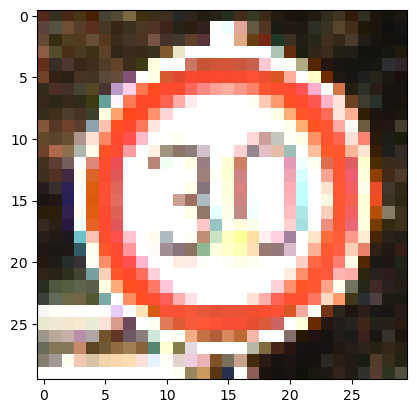

1/1 [==============================] - 0s 30ms/step
[[1.28527345e-05 9.98745084e-01 9.33887568e-05 9.65222555e-11
  1.74356646e-05 1.13114959e-03 6.15279746e-12 1.16456160e-08
  6.14268725e-09 1.03768704e-15 3.38415455e-15 2.52826297e-13
  2.80746715e-12 7.01215778e-13 4.58395821e-12 7.92183506e-12
  2.65270173e-13 7.98392419e-15 7.38299667e-14 2.01288082e-19
  1.49445739e-15 4.79140968e-16 6.93479326e-19 2.19228068e-14
  2.04345377e-14 9.30979808e-14 3.84188014e-15 1.50024292e-16
  7.43003495e-15 1.56956984e-14 1.53764836e-17 6.37306531e-15
  5.92828737e-14 2.54924166e-19 5.85034539e-17 1.84910109e-15
  2.49103539e-18 4.58173970e-15 1.52266115e-14 8.68476050e-17
  3.38145172e-11 1.27863677e-17 7.44986348e-14]]
0.9987451
1
(2, 'Speed limit (30km/h)')


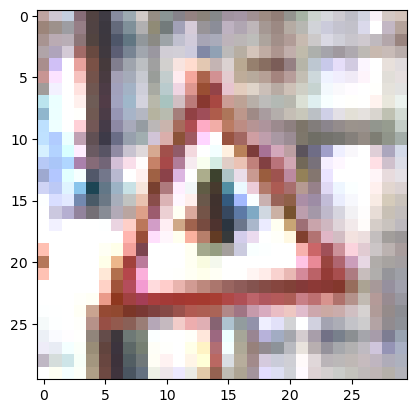

1/1 [==============================] - 0s 27ms/step
[[0.0000000e+00 4.9189876e-35 2.3418529e-34 7.1825520e-34 0.0000000e+00
  4.0436124e-34 1.2307629e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 4.0331839e-26 0.0000000e+00 3.0960504e-37
  0.0000000e+00 5.4294084e-29 0.0000000e+00 2.9584467e-28 7.6866701e-34
  5.4865657e-27 1.0244373e-22 0.0000000e+00 9.7397668e-25 1.1384707e-27
  2.9367404e-24 4.5672893e-32 8.4627693e-13 3.3497364e-22 1.2609506e-28
  7.4251843e-18 3.5665854e-33 9.5603470e-33 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 8.5098161e-37 0.0000000e+00
  0.0000000e+00 3.0485684e-33 0.0000000e+00]]
1.0
11
(12, 'Right-of-way at intersection')


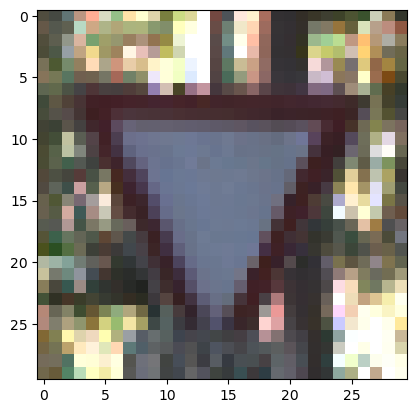

1/1 [==============================] - 0s 27ms/step
[[5.19562959e-26 6.53707272e-18 4.73616937e-16 8.26608927e-19
  9.58748718e-17 2.91703324e-17 2.81428841e-31 1.83239495e-25
  1.02289094e-22 3.67203077e-19 7.97825462e-18 6.82133152e-24
  3.69368016e-19 1.00000000e+00 1.79535071e-13 7.48704501e-11
  9.12887134e-28 1.61298019e-17 5.58332826e-20 1.56208070e-29
  3.24182519e-29 1.40331918e-23 1.64235956e-26 2.87357896e-28
  6.20366109e-27 2.48859736e-17 1.45654672e-22 4.51379739e-27
  8.08612761e-28 6.78017007e-21 7.60066974e-30 1.05408525e-30
  6.43745840e-21 1.17659500e-22 1.33920972e-23 1.36547291e-22
  1.28302395e-19 1.76486515e-28 2.56839921e-23 1.72888069e-22
  3.46993754e-23 8.06956747e-31 1.97688897e-26]]
1.0
13
(14, 'Yield')


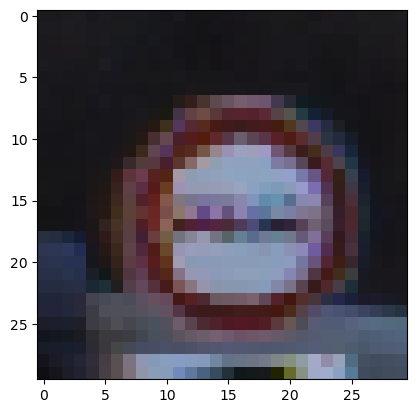

1/1 [==============================] - 0s 19ms/step
[[5.1184763e-20 2.0858482e-18 4.9198076e-17 4.5925950e-12 8.4768234e-19
  2.9743898e-16 1.5724393e-34 3.6155363e-17 6.0135453e-16 9.9986374e-01
  1.3620897e-04 2.4135213e-20 8.2655070e-17 3.1232633e-16 1.6147850e-18
  2.0304176e-15 5.3209334e-12 5.0045300e-18 1.8708943e-22 1.2359693e-12
  9.6833349e-14 4.8440222e-21 1.0663307e-26 2.1751373e-10 1.3944875e-25
  7.3807071e-20 1.2107792e-19 8.6231766e-24 1.0749873e-22 1.2189123e-19
  2.8855583e-26 2.8223223e-16 1.8819073e-25 1.9524297e-14 4.3989760e-19
  1.2820005e-15 7.3361102e-18 4.4992338e-23 4.5174337e-21 1.8448493e-22
  6.3426290e-18 7.8518194e-17 5.5486518e-16]]
0.99986374
9
(10, 'No passing')


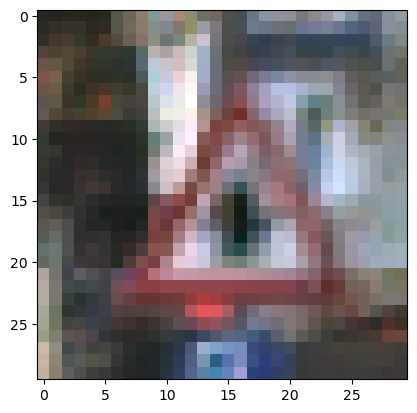

1/1 [==============================] - 0s 25ms/step
[[9.3665301e-25 2.8781969e-20 1.3633307e-18 5.2289645e-21 1.5121166e-27
  3.7989539e-19 7.9765326e-29 2.2314704e-24 1.8816883e-26 3.3928311e-21
  1.1638276e-22 9.9999952e-01 1.1241630e-14 9.7818421e-24 5.4851387e-20
  1.3281497e-29 2.0777565e-22 8.7303085e-23 2.8505337e-18 3.4363070e-15
  6.5402371e-18 3.8912319e-08 2.7402567e-24 2.1059834e-12 1.6066199e-14
  1.4613986e-15 2.0821732e-17 3.2054164e-08 1.7193691e-11 8.6410385e-14
  4.7017028e-07 5.3076763e-16 3.1106556e-23 3.0705331e-25 4.9132021e-23
  5.2496143e-27 1.5539396e-34 4.9146054e-24 4.0391449e-24 2.9287659e-29
  1.6545000e-20 9.2067828e-21 2.0932427e-25]]
0.9999995
11
(12, 'Right-of-way at intersection')


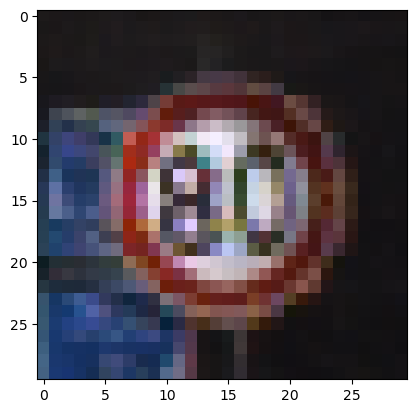

1/1 [==============================] - 0s 24ms/step
[[2.0205979e-10 2.4344553e-03 9.6918473e-07 4.9576232e-07 2.1938205e-09
  9.9754709e-01 1.7034585e-05 5.6668747e-10 8.5754063e-14 6.3001894e-17
  1.5149193e-11 6.2118380e-11 1.3081211e-11 2.5071552e-14 1.5990455e-11
  9.9588222e-15 4.6185291e-14 3.9088337e-17 1.5961301e-14 1.2685133e-18
  1.1424593e-15 6.6221362e-11 3.6433167e-20 1.3579675e-15 5.1626849e-16
  8.3525398e-10 2.1188990e-16 1.2611751e-17 4.7733398e-15 5.1232374e-14
  1.5822732e-16 1.0983893e-10 6.0779141e-15 4.6610689e-18 2.4775157e-18
  3.8225927e-13 1.1020421e-15 1.1431241e-19 4.0446683e-17 5.0752585e-18
  5.5054577e-13 1.5167066e-18 1.2742560e-10]]
0.9975471
5
(6, 'Speed limit (80km/h)')


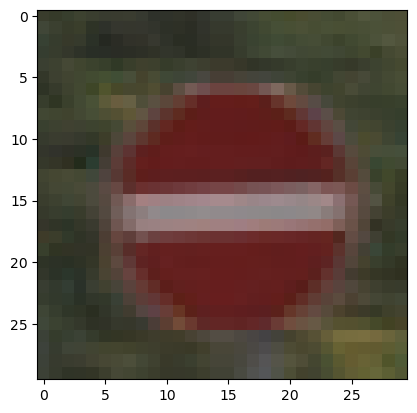

1/1 [==============================] - 0s 15ms/step
[[5.96326591e-29 4.70052284e-27 1.66196379e-29 2.01293232e-30
  1.00243055e-27 8.94291185e-29 0.00000000e+00 8.63384529e-36
  4.78353814e-25 3.83761830e-31 2.59899913e-25 9.83882986e-34
  1.62976003e-32 4.08152195e-25 1.17333316e-20 3.59214993e-31
  0.00000000e+00 1.00000000e+00 5.60223343e-34 5.01314674e-31
  2.46647941e-34 1.30041783e-34 2.25771185e-34 1.15088867e-28
  0.00000000e+00 4.53739696e-27 4.67827562e-32 0.00000000e+00
  0.00000000e+00 9.41369520e-28 0.00000000e+00 3.59788600e-29
  0.00000000e+00 8.11130419e-36 0.00000000e+00 0.00000000e+00
  5.42247306e-37 0.00000000e+00 9.84887380e-38 2.14377688e-38
  1.30610826e-37 0.00000000e+00 0.00000000e+00]]
1.0
17
(18, 'No entry')


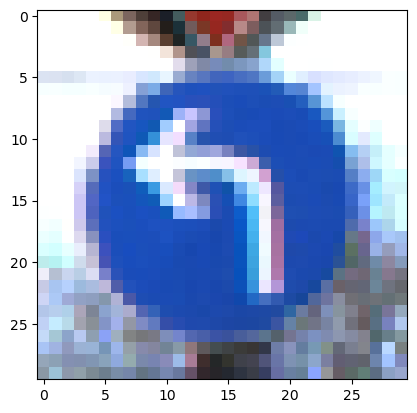

1/1 [==============================] - 0s 11ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5142887e-35 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  7.8994956e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.0748688e-38
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  6.6096267e-37 1.9334717e-37 0.0000000e+00 4.2045975e-18 0.0000000e+00
  2.4292169e-31 0.0000000e+00 0.0000000e+00]]
1.0
34
(35, 'Turn left ahead')


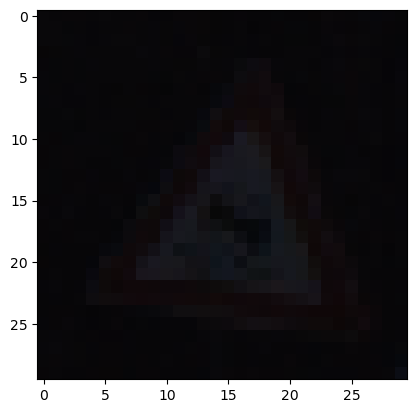

1/1 [==============================] - 0s 23ms/step
[[2.5679606e-06 2.7610311e-05 2.0363237e-04 5.9118320e-04 4.4866847e-05
  7.4013817e-04 1.2812012e-07 8.8867797e-05 4.0586988e-04 1.3060454e-02
  7.1443640e-02 1.4614835e-02 6.1623676e-04 2.3902311e-04 1.9314491e-04
  1.9346926e-05 1.1583629e-04 4.6177162e-04 1.4157154e-04 5.3589928e-01
  2.2185981e-02 3.2900888e-02 9.7800503e-06 1.7812712e-01 1.3033957e-03
  1.2208577e-03 5.3184520e-04 2.7229812e-03 6.4226973e-04 1.5911300e-02
  9.4299782e-03 8.9116819e-02 1.3271843e-06 6.7249397e-03 3.4003362e-05
  2.9856768e-05 4.8211659e-06 1.7925186e-06 6.4153050e-05 3.9358052e-05
  2.8118435e-05 3.3365493e-05 2.4947214e-05]]
0.5358993
19
(20, 'Dangerous curve left')


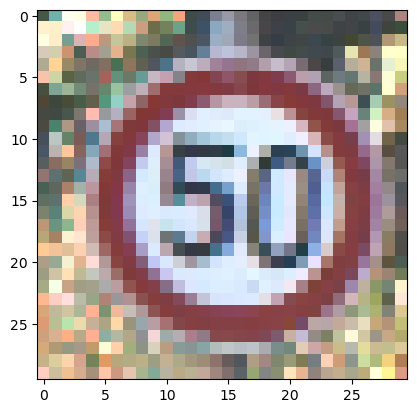

1/1 [==============================] - 0s 22ms/step
[[9.4577771e-23 3.0353341e-14 1.0000000e+00 5.5646151e-13 5.0167141e-20
  3.1515565e-10 8.6157475e-29 7.8802332e-23 1.4880583e-23 1.1725933e-30
  1.5140224e-34 2.3421437e-30 4.8911603e-29 2.9942108e-28 4.5753306e-31
  3.2847108e-28 2.7566142e-31 1.5972085e-31 2.2196133e-37 8.6865506e-33
  3.8189090e-32 3.7444083e-36 0.0000000e+00 8.9649084e-29 5.5825345e-37
  5.8619718e-30 1.4195700e-36 1.7825763e-31 0.0000000e+00 9.0377531e-33
  0.0000000e+00 8.4062574e-27 2.9071100e-34 6.2510241e-36 5.1032882e-33
  1.3074013e-34 3.9555301e-37 5.0582021e-35 4.6771834e-26 0.0000000e+00
  6.1652601e-25 1.3477287e-36 0.0000000e+00]]
1.0
2
(3, 'Speed limit (50km/h)')


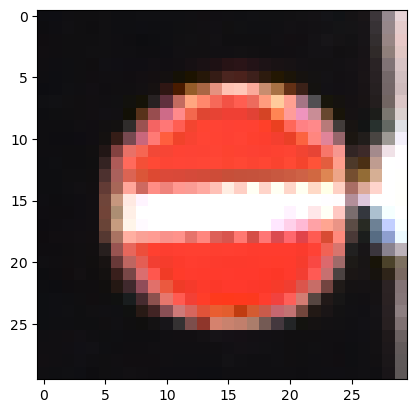

1/1 [==============================] - 0s 25ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
17
(18, 'No entry')


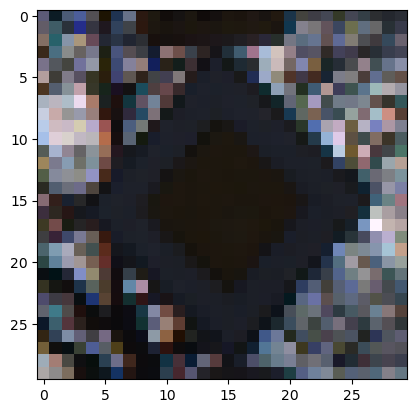

1/1 [==============================] - 0s 24ms/step
[[1.5014479e-06 1.0029743e-05 2.2592159e-05 2.6008154e-05 5.8318869e-06
  2.0651409e-04 2.0298077e-07 1.5869176e-06 1.9495468e-05 1.4820574e-06
  5.5405800e-04 3.4037719e-05 9.9775070e-01 2.9492564e-04 2.7680151e-05
  6.4645819e-06 5.2632544e-07 6.1799592e-04 7.2818680e-06 1.7340520e-07
  8.7988010e-06 5.1557445e-06 3.8909771e-08 1.3352333e-06 1.6758530e-07
  7.8314042e-05 8.5267529e-05 2.4285836e-07 1.2459958e-06 1.0211778e-04
  1.2912479e-06 2.9563684e-05 2.8049710e-05 6.2809499e-06 5.0446010e-07
  8.9836867e-06 5.3325812e-06 1.2894968e-06 2.1325037e-05 4.1945472e-07
  2.3033839e-05 1.6554316e-07 2.1219998e-06]]
0.9977507
12
(13, 'Priority road')


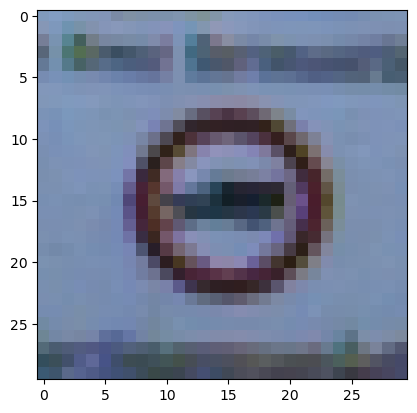

1/1 [==============================] - 0s 22ms/step
[[7.1276340e-10 2.7668893e-08 1.3597304e-07 8.9577916e-06 1.5992955e-08
  1.0944278e-04 1.1662880e-16 4.7262397e-06 2.2496670e-06 6.8497479e-01
  1.0418350e-01 2.3321206e-11 1.6709942e-08 3.0610963e-08 4.5018336e-08
  1.5678232e-07 2.1071592e-01 2.8928402e-09 1.0645193e-12 2.0250823e-09
  4.5453921e-10 1.6948747e-13 1.9549548e-15 2.8044054e-08 1.8907864e-14
  7.7643398e-13 4.6317808e-10 3.3963246e-14 2.6524566e-14 1.6098300e-11
  1.3354826e-14 7.1499195e-11 2.7493275e-13 3.4822709e-09 7.3889185e-12
  2.6799141e-09 5.3897109e-10 7.4633818e-15 6.6458360e-11 3.4549122e-14
  3.0487419e-09 4.8520324e-12 3.9569764e-10]]
0.6849748
9
(10, 'No passing')


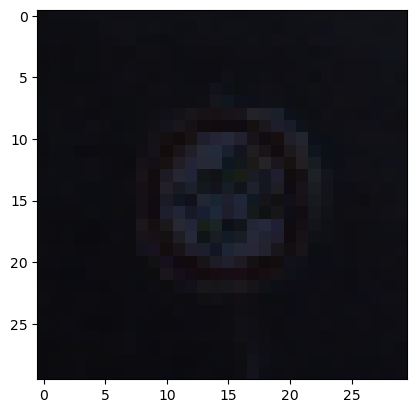

1/1 [==============================] - 0s 33ms/step
[[1.00752420e-03 8.56594834e-03 3.28511819e-02 5.38326502e-02
  2.46934611e-02 1.56763792e-01 6.52633462e-05 1.33272083e-02
  1.60095423e-01 1.01857997e-01 1.58137694e-01 6.88043539e-04
  3.17117432e-03 2.38191187e-02 9.87113453e-03 7.64874090e-03
  1.53777320e-02 4.42639180e-03 1.00207853e-03 1.12782000e-03
  1.17613450e-02 1.80190153e-04 1.39139142e-04 3.49347875e-03
  2.82904715e-04 6.37125084e-03 5.33501385e-03 1.19021155e-04
  3.34417069e-04 5.12077939e-04 1.02227932e-04 3.43032554e-03
  2.35823303e-04 2.00393535e-02 2.58620665e-03 1.41451349e-02
  1.20296665e-01 6.05501409e-04 1.04065882e-02 9.28737514e-04
  1.92493405e-02 2.09887046e-04 9.04953689e-04]]
0.16009542
8
(9, 'Speed limit (120km/h)')


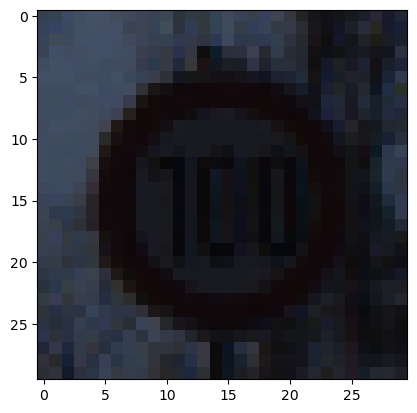

1/1 [==============================] - 0s 29ms/step
[[2.05933731e-07 4.77787653e-05 2.99091407e-05 2.07855617e-08
  1.27874184e-04 8.12486513e-04 2.50362242e-09 9.85824466e-01
  1.31513532e-02 7.77261775e-08 8.35791298e-07 3.53245166e-09
  3.15833439e-08 1.90797245e-08 1.34789313e-09 2.81686965e-07
  2.94035036e-08 1.90212512e-09 7.59197816e-10 7.70691358e-11
  1.21586785e-09 7.16623250e-09 6.49553314e-14 6.90608104e-09
  1.42905643e-09 4.57638372e-09 1.80503736e-08 4.44955982e-11
  3.38402015e-11 2.67249223e-10 8.84337492e-10 7.90039234e-09
  1.07454280e-11 2.82409962e-09 1.21537745e-11 2.16838747e-09
  1.26788624e-09 3.89702881e-10 2.91875235e-09 1.86807528e-10
  4.68999951e-06 5.79855378e-14 1.93950882e-08]]
0.98582447
7
(8, 'Speed limit (100km/h)')


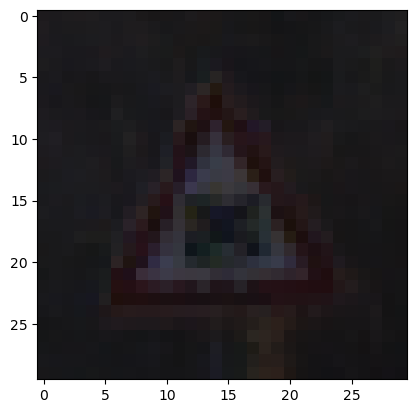

1/1 [==============================] - 0s 27ms/step
[[5.1255618e-08 1.5502837e-07 5.7829163e-07 7.1326514e-07 3.9885784e-09
  1.6787560e-06 2.1924880e-08 2.1904788e-07 3.8958743e-07 2.3655558e-07
  9.4638878e-08 1.7293802e-02 1.2437110e-06 4.3565738e-09 7.4712671e-06
  1.1041542e-09 2.9366502e-08 2.3844547e-07 8.7726557e-06 7.2270886e-05
  2.4277975e-03 4.1404450e-03 4.6773568e-08 5.0180503e-03 2.6849460e-02
  3.6096608e-04 4.8128510e-05 1.6276495e-03 2.0590327e-03 8.8292053e-03
  9.3063271e-01 6.1771099e-04 2.4167655e-08 2.3550200e-08 1.6234506e-07
  1.1234176e-09 5.9476292e-11 3.4698389e-10 4.0541912e-07 8.4067697e-11
  6.4568518e-08 2.0462329e-08 1.6585042e-07]]
0.9306327
30
(31, 'Beware of ice/snow')


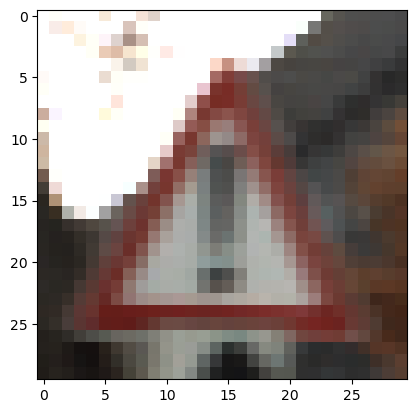

1/1 [==============================] - 0s 24ms/step
[[1.3279825e-30 2.0544091e-18 4.9534857e-27 3.3168339e-34 3.9839736e-20
  1.7314719e-25 1.3797207e-36 3.3277689e-28 9.4087463e-27 2.0983378e-31
  3.2385761e-28 1.2760185e-21 1.1921742e-20 7.1633031e-30 1.3771329e-22
  1.0898294e-23 5.9335540e-32 1.2305786e-24 1.0000000e+00 1.5161506e-25
  3.9438926e-25 4.8630451e-23 4.8471455e-19 1.7697853e-22 5.1682207e-15
  6.1174168e-19 5.0929921e-10 7.3995809e-14 2.7506206e-28 4.1676873e-21
  6.8874957e-28 6.7289875e-24 2.8766858e-26 9.0478355e-31 2.2856897e-30
  1.2893840e-32 3.4781903e-25 3.4935506e-24 1.1886247e-25 4.8004483e-32
  4.5051862e-24 6.9437452e-34 3.8731544e-29]]
1.0
18
(19, 'General caution')


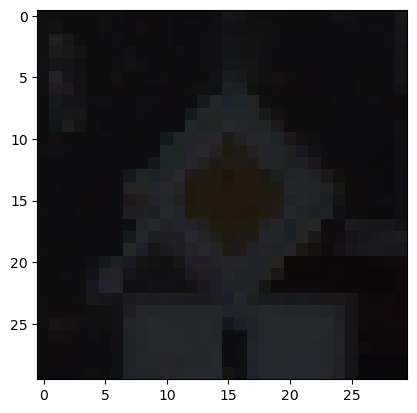

1/1 [==============================] - 0s 22ms/step
[[3.6844376e-08 1.1892892e-06 2.1075988e-07 6.0212960e-07 1.7941255e-07
  1.3527216e-05 8.6509054e-08 3.0022287e-07 1.4569467e-07 9.2020457e-08
  5.0656090e-06 2.8380473e-06 9.9993217e-01 1.4710101e-07 5.0687840e-06
  1.1475313e-06 7.1585174e-07 8.3905718e-07 9.4642630e-08 6.7062696e-11
  1.6397162e-07 2.0124729e-08 2.9941608e-10 1.6363725e-08 7.5012956e-09
  1.1606661e-06 5.7605064e-07 1.3005644e-09 8.5120753e-08 1.5468113e-05
  1.3664250e-07 5.9210254e-08 1.3445089e-06 2.0047045e-07 3.3329702e-08
  2.1496689e-06 1.6420973e-08 5.6239901e-07 2.7324854e-06 4.1641385e-10
  1.0556257e-05 1.8745578e-08 4.1221125e-07]]
0.99993217
12
(13, 'Priority road')


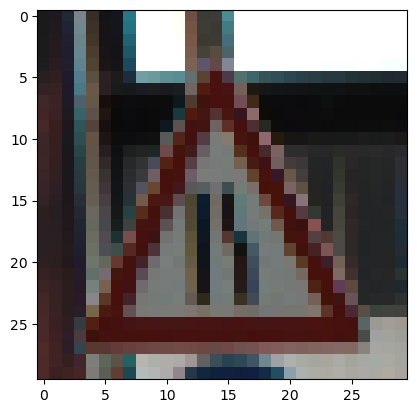

1/1 [==============================] - 0s 32ms/step
[[3.7948740e-15 1.6073321e-11 1.8132429e-10 1.4005495e-12 2.0477358e-11
  3.7366013e-12 5.4428097e-17 5.0993731e-13 3.9551400e-11 3.7536474e-11
  3.3728693e-11 1.2944763e-07 2.2275561e-09 8.4453954e-12 1.0506636e-11
  9.7873064e-12 4.5879828e-14 5.5267436e-12 4.3227523e-08 1.7981906e-08
  4.2819747e-07 2.7351450e-07 1.1256007e-12 3.1689109e-07 9.9994528e-01
  4.2075400e-05 1.6936652e-06 9.3120871e-06 1.4725754e-08 3.4215833e-07
  9.7603682e-08 1.5490458e-09 1.3387988e-16 4.0857788e-13 4.2571082e-11
  5.9911467e-13 6.1178882e-15 4.6706604e-15 1.5627902e-11 2.0692727e-17
  6.3261744e-13 6.0957169e-13 1.2251920e-10]]
0.9999453
24
(25, 'Road narrows on the right')


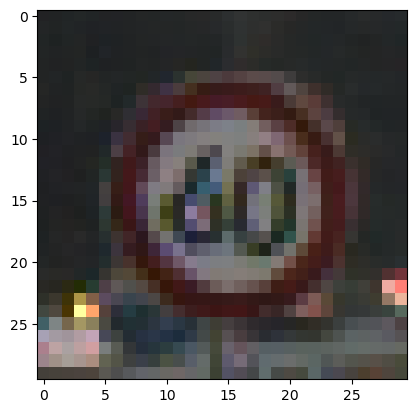

1/1 [==============================] - 0s 34ms/step
[[5.3774988e-14 9.7114219e-11 9.9274966e-10 9.9992990e-01 4.7827161e-15
  7.0067807e-05 1.2997078e-10 2.6328266e-15 2.6575471e-16 2.6338354e-12
  4.4847912e-13 2.6630087e-11 2.0621107e-12 1.3782073e-16 8.5468606e-14
  5.7697858e-14 2.9771512e-09 7.6801193e-20 2.2152055e-20 3.3032285e-20
  5.8003033e-15 2.0763345e-16 2.3078268e-22 4.5535766e-16 1.4566516e-20
  2.0403105e-13 2.8574427e-19 6.4595911e-20 2.2846762e-14 2.3895675e-13
  1.2991790e-15 7.6577807e-17 5.8522673e-11 1.7095702e-15 1.1374274e-12
  2.0765369e-12 5.3046984e-15 1.3666657e-20 1.1974005e-12 4.6512959e-23
  4.7006998e-14 9.4328733e-14 4.1959319e-14]]
0.9999299
3
(4, 'Speed limit (60km/h)')


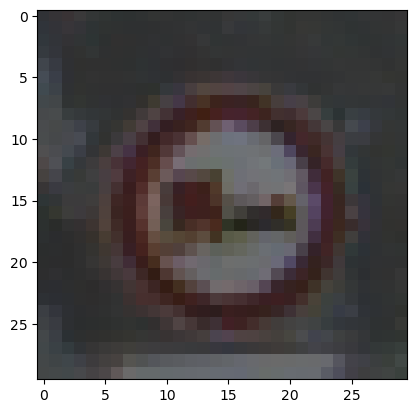

1/1 [==============================] - 0s 31ms/step
[[2.7493670e-18 4.0486569e-14 2.3744838e-13 7.8894564e-12 5.9400557e-14
  1.3330699e-10 2.4842106e-22 4.8790954e-11 1.1973058e-14 1.0017478e-03
  9.9899787e-01 1.3230785e-15 1.8276178e-10 1.0389218e-12 4.9587705e-13
  6.9888041e-12 3.5106265e-07 1.3579517e-15 8.9628143e-17 4.2796585e-15
  1.5689113e-13 2.7912270e-17 1.0905996e-23 3.8128836e-14 3.5144671e-19
  1.6140222e-16 9.8033668e-17 7.4420008e-19 1.1330825e-18 6.9719176e-17
  9.7344114e-20 1.5469823e-16 2.1445443e-18 9.7212967e-12 1.7729195e-17
  1.0950557e-12 3.5713941e-14 2.0123768e-19 4.4787497e-16 1.1439620e-18
  4.1972692e-14 1.2334566e-15 2.0184501e-08]]
0.99899787
10
(11, 'No passing veh over 3.5 tons')


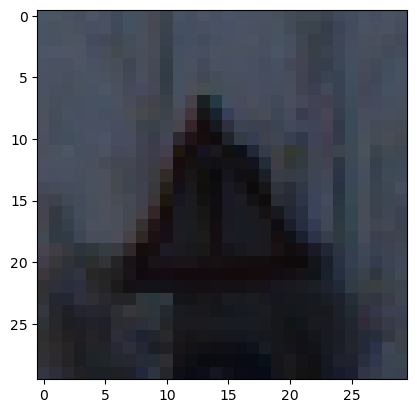

1/1 [==============================] - 0s 28ms/step
[[2.6635634e-04 3.3367178e-03 1.3666960e-03 2.5273920e-03 8.6588325e-04
  9.0337032e-03 5.4434018e-04 4.3020255e-04 2.4810159e-03 3.4606108e-04
  4.4194530e-03 6.3861934e-03 6.0051925e-02 2.8807819e-03 3.8050335e-02
  5.2313250e-04 1.6375673e-04 3.4666494e-01 2.2351593e-02 1.4659845e-03
  2.5361802e-02 2.8898816e-03 2.7558386e-02 1.3239166e-02 3.1951990e-03
  1.5719223e-01 7.9715617e-02 1.9242904e-03 6.1010383e-03 8.6841658e-02
  2.5377404e-03 7.6867089e-02 2.6259539e-03 8.2689570e-04 2.9900705e-04
  1.6221606e-04 4.8910743e-03 1.7776193e-04 2.4375019e-03 1.6470689e-04
  3.4611125e-04 7.4425610e-05 4.1382079e-04]]
0.34666494
17
(18, 'No entry')


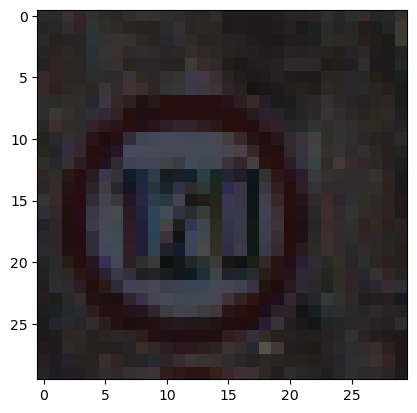

1/1 [==============================] - 0s 22ms/step
[[1.94005240e-02 2.79082730e-02 1.89067703e-02 5.12907747e-03
  1.24798845e-02 2.89433133e-02 1.12500325e-04 4.65614954e-03
  2.79529300e-02 7.87464902e-03 1.07429521e-02 1.52975554e-03
  2.66986247e-03 1.41145885e-01 5.55448830e-01 3.61578278e-02
  1.34128320e-03 5.00175022e-02 4.02624113e-03 5.42844471e-04
  2.01394525e-03 7.77320063e-04 3.84387258e-03 5.00041014e-03
  7.00624601e-04 3.57729406e-03 5.87690854e-03 2.35207626e-04
  9.75198229e-04 4.21812851e-03 3.95408279e-04 1.13609212e-03
  5.84397872e-04 1.77936535e-03 3.49821552e-04 6.98013639e-04
  1.28542946e-03 1.35346455e-03 2.10690917e-03 1.70929229e-03
  3.24266776e-03 1.86525052e-04 9.66686755e-04]]
0.55544883
14
(15, 'Stop')


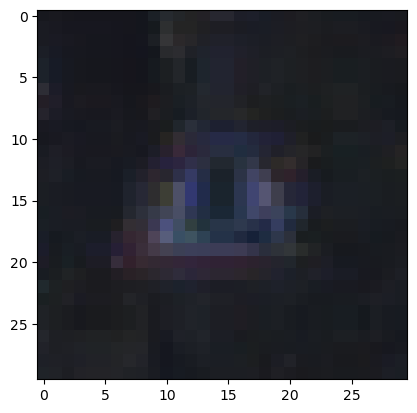

1/1 [==============================] - 0s 25ms/step
[[1.0413011e-03 8.5168564e-01 6.0725408e-03 1.0063211e-05 7.3725842e-02
  9.1082677e-03 2.6791911e-05 1.3214559e-04 1.4486492e-05 3.3341021e-06
  4.2229098e-05 9.6441916e-05 1.2919726e-03 2.3850580e-04 1.3187088e-04
  1.9377646e-04 4.0889596e-08 3.3796136e-04 3.7953362e-02 3.2823552e-06
  1.4459548e-05 2.8334124e-04 8.4195863e-06 3.9576058e-05 1.1685955e-04
  1.2698874e-02 2.8278946e-04 1.0969252e-04 2.2728036e-06 1.1736783e-04
  2.3825662e-06 5.1803346e-04 1.6631113e-05 5.3047556e-06 4.3580376e-06
  5.6620331e-05 1.7140586e-04 1.4189407e-03 3.0575215e-04 1.5544428e-03
  1.5732895e-04 1.7611227e-07 5.1330549e-06]]
0.85168564
1
(2, 'Speed limit (30km/h)')


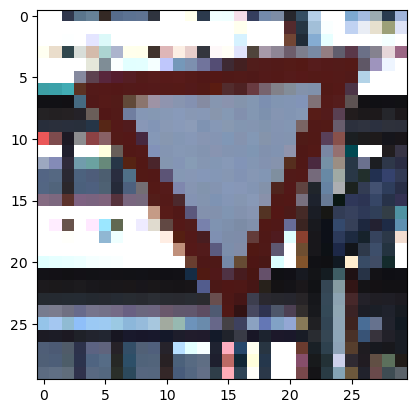

1/1 [==============================] - 0s 19ms/step
[[5.51990694e-33 3.06485184e-22 1.37735884e-22 2.60385186e-25
  4.93236976e-26 2.25047703e-22 2.43637374e-37 5.70504290e-33
  5.61270247e-31 6.08268014e-25 3.58672689e-24 3.13626810e-27
  8.43603508e-20 1.00000000e+00 1.01031614e-19 4.23904785e-17
  5.11060276e-37 3.92833533e-26 4.98889589e-25 4.99993213e-38
  1.56791606e-33 6.22834535e-27 1.66443098e-30 1.85256606e-33
  4.31915405e-28 4.41416993e-18 2.11489437e-29 2.03532898e-33
  4.95059058e-29 1.33810168e-23 5.91769172e-30 4.12581585e-36
  5.03273094e-23 1.48833684e-30 2.20575755e-26 1.70029898e-29
  2.44415773e-28 4.09709547e-30 1.50239190e-23 1.76060467e-25
  2.65233328e-25 3.84261543e-30 6.85145741e-30]]
1.0
13
(14, 'Yield')


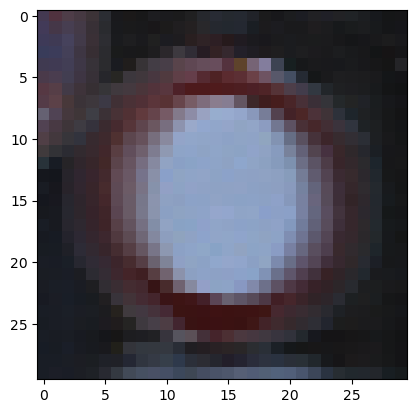

1/1 [==============================] - 0s 16ms/step
[[2.08070310e-13 1.62440926e-06 3.86178726e-06 1.61075988e-08
  2.84292328e-04 2.78279595e-06 6.07177611e-14 7.64846381e-11
  1.21656175e-11 2.27556512e-07 1.35194819e-06 6.73005353e-14
  8.44282155e-08 3.32673284e-04 1.64135031e-06 9.99371469e-01
  4.34755218e-11 6.72273170e-09 2.18715948e-10 1.90513867e-15
  6.81385067e-15 7.33772201e-13 8.67501736e-14 2.12428325e-14
  7.09397276e-13 3.93230026e-09 8.35466191e-13 8.33622044e-15
  2.53273915e-18 6.42008061e-12 2.28876760e-18 3.97289242e-15
  6.09825079e-10 1.46444010e-10 2.15464643e-11 5.49281620e-10
  5.08800735e-09 1.21072171e-14 2.92505886e-09 4.00585699e-14
  1.02989860e-10 6.34295473e-14 1.36811905e-12]]
0.99937147
15
(16, 'No vehicles')


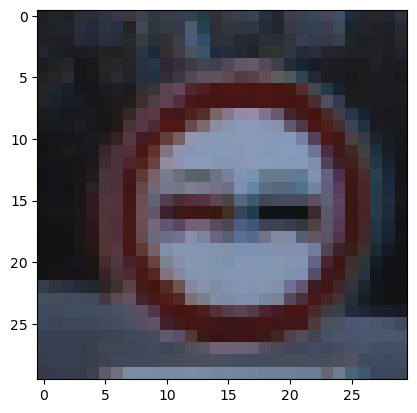

1/1 [==============================] - 0s 19ms/step
[[4.2824575e-26 1.9878430e-22 3.6265343e-21 6.7117615e-16 2.4864927e-23
  1.2757070e-21 0.0000000e+00 1.2425613e-22 9.0844635e-23 1.0000000e+00
  1.0351206e-10 4.9213454e-23 1.2814356e-17 1.0258506e-19 1.1011218e-21
  3.3752369e-14 5.3928839e-10 1.3138890e-22 5.8013478e-24 3.4973400e-15
  2.3833961e-15 3.9428528e-26 9.6566714e-33 3.6513482e-13 1.7573705e-25
  2.1223848e-23 3.3179789e-23 1.7341225e-25 9.2877249e-25 9.5076342e-21
  7.0167859e-26 1.7382031e-24 1.5767344e-24 8.6740674e-18 6.2294576e-21
  1.9148770e-17 5.3753026e-25 9.3471700e-29 9.2826296e-24 4.7142172e-30
  1.8693747e-20 5.9313876e-15 5.8702620e-19]]
1.0
9
(10, 'No passing')


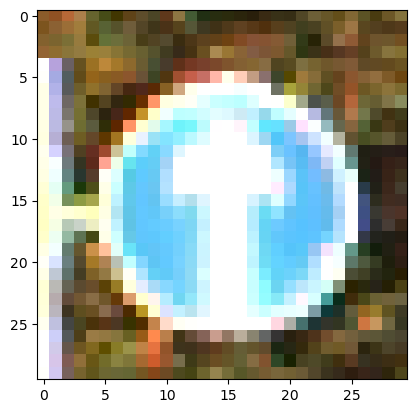

1/1 [==============================] - 0s 25ms/step
[[5.95859488e-17 2.15182283e-15 8.63281665e-15 1.31935816e-11
  5.95125746e-17 3.04275512e-13 1.00335990e-20 3.60227076e-19
  2.02961568e-17 1.26774936e-12 2.55343368e-11 2.76894605e-15
  8.56632335e-11 2.38529717e-11 5.92166239e-16 4.14129079e-14
  7.70121746e-14 6.68487336e-18 1.34690373e-17 6.04010923e-18
  1.92673890e-14 4.59046726e-17 1.00378330e-23 2.86124686e-16
  2.87599196e-20 8.89537061e-16 4.17119850e-15 2.32261669e-20
  5.47378677e-14 2.61082470e-13 1.27446850e-18 1.01887186e-22
  4.61621310e-16 1.95832905e-09 1.12187756e-07 9.99999881e-01
  2.97408348e-10 1.24321701e-12 9.30909516e-10 2.65655737e-16
  1.36131696e-11 6.30947389e-15 1.31228570e-15]]
0.9999999
35
(36, 'Ahead only')


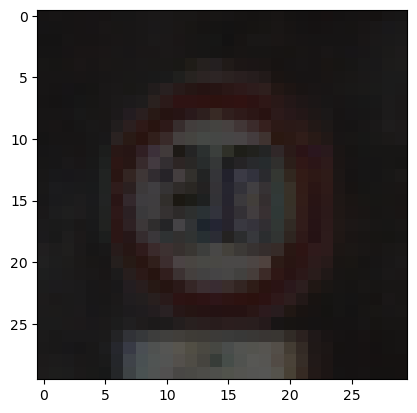

1/1 [==============================] - 0s 25ms/step
[[1.61880926e-08 8.99702354e-05 8.84827634e-04 1.19522831e-03
  3.97885242e-06 9.97816324e-01 1.66353772e-07 7.78470439e-06
  6.94349112e-08 1.42363543e-08 8.22488516e-07 1.84037212e-08
  3.79086913e-08 1.58293911e-08 3.25156329e-08 2.00613101e-07
  4.25259863e-08 1.00810686e-10 3.05354436e-10 8.37038511e-12
  1.75902667e-10 5.35344880e-09 7.78754285e-13 6.63290312e-10
  9.96958592e-12 2.80320052e-07 5.91140747e-11 3.15780561e-11
  2.40970568e-12 6.17399021e-10 2.18556336e-11 2.00388229e-07
  5.61530648e-11 2.25113550e-09 9.80905114e-12 4.30513003e-09
  1.58498157e-08 1.14008293e-12 2.13752860e-09 7.52951434e-12
  7.37861683e-08 2.01135278e-13 6.75387635e-10]]
0.9978163
5
(6, 'Speed limit (80km/h)')


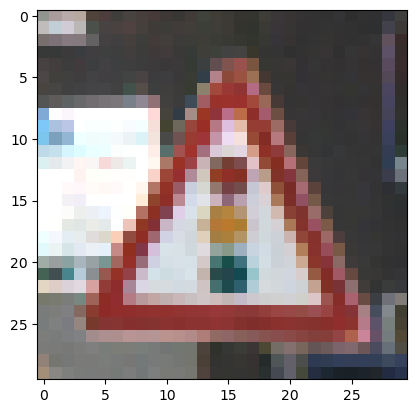

1/1 [==============================] - 0s 26ms/step
[[8.3718924e-26 6.6307644e-22 3.1856468e-26 1.1825967e-31 6.8025282e-21
  2.1023916e-24 2.7111721e-34 1.4119407e-26 9.7172329e-19 7.4597219e-29
  3.7660135e-27 1.3710278e-20 2.4504638e-17 2.8510500e-23 2.8349881e-23
  3.3475510e-30 3.0306283e-27 3.3136860e-26 1.3165587e-10 1.9341284e-22
  1.7137832e-16 8.3157905e-23 8.5532724e-20 3.6430518e-19 1.7084221e-11
  1.5154809e-16 1.0000000e+00 1.0752889e-16 1.7330208e-22 4.3159761e-20
  1.2753735e-25 2.1718726e-21 1.6585835e-27 9.3494119e-30 6.3794997e-35
  8.8051380e-29 8.3826387e-24 7.1191958e-31 5.7797608e-26 4.3503499e-31
  1.7279549e-25 0.0000000e+00 1.7174737e-32]]
1.0
26
(27, 'Traffic signals')


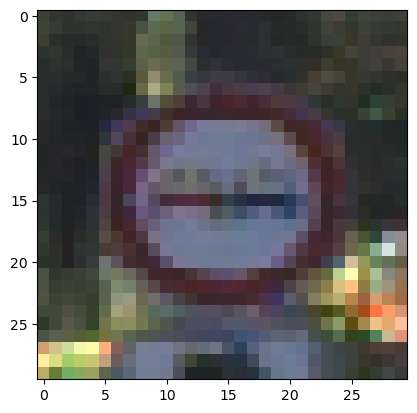

1/1 [==============================] - 0s 15ms/step
[[7.6764015e-17 1.0296293e-15 1.5891895e-14 2.3638052e-11 1.8926994e-14
  1.1572322e-12 6.4209931e-26 6.7445513e-14 1.1423825e-13 9.9896789e-01
  1.0320363e-03 3.8109220e-18 1.4137351e-10 5.9017159e-11 1.8184821e-12
  2.7087327e-10 3.6713484e-08 3.4644962e-13 5.5884597e-16 6.1751021e-11
  1.4890522e-10 6.7560964e-19 1.2007252e-18 2.1663942e-09 3.4702563e-17
  6.7493638e-14 2.1368838e-12 2.3769498e-17 4.5543655e-18 4.9954181e-16
  2.4433224e-20 5.6897717e-14 1.4845493e-17 9.1705560e-13 3.2155546e-16
  3.6391571e-13 1.4394739e-12 8.5155540e-19 2.4874721e-16 2.0652243e-17
  4.1933264e-14 1.2646379e-12 5.8157201e-14]]
0.9989679
9
(10, 'No passing')


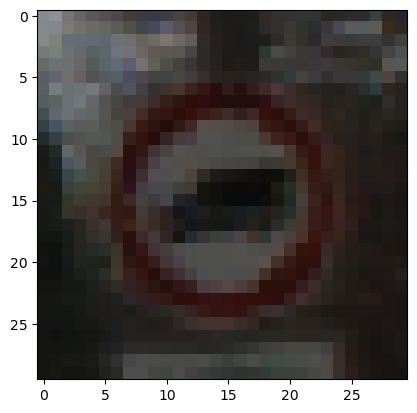

1/1 [==============================] - 0s 27ms/step
[[1.07788063e-08 3.30019816e-07 4.51824320e-08 3.56112901e-06
  1.65769194e-08 1.16166702e-05 5.23456556e-10 1.10447210e-07
  1.34935902e-07 3.63178333e-05 9.46197787e-09 5.04745685e-07
  3.54842487e-05 3.74500125e-10 1.24036063e-07 2.22985491e-07
  9.99910474e-01 4.15743745e-10 4.09981105e-10 5.00803066e-10
  2.61088843e-07 3.95839611e-12 8.08616615e-15 3.67179283e-08
  1.38798764e-10 2.92700919e-10 1.89609151e-09 3.63690883e-11
  1.59368536e-08 5.56789725e-09 5.13429166e-09 8.16474926e-13
  4.99106477e-07 4.82220597e-10 5.37465983e-09 1.29558764e-08
  1.92768426e-10 1.43336276e-12 3.42187398e-08 3.02029873e-16
  1.23421104e-08 5.66660638e-08 1.41304568e-07]]
0.9999105
16
(17, 'Veh > 3.5 tons prohibited')


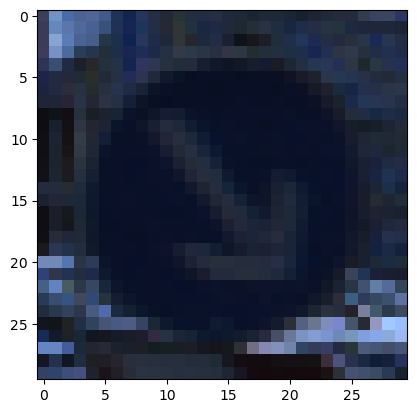

1/1 [==============================] - 0s 25ms/step
[[4.0955558e-19 2.9540426e-17 1.6944440e-16 8.2203097e-14 1.0641101e-20
  1.1375998e-13 3.3149854e-20 3.9783373e-21 7.5514777e-16 2.5201975e-19
  2.5950060e-18 1.1657682e-17 3.1479573e-14 1.3032120e-14 1.0853959e-20
  2.8745020e-19 3.6434947e-20 2.4352520e-20 4.5836612e-17 6.3146744e-23
  8.3670630e-13 4.3813080e-17 5.1159554e-19 3.9869616e-16 1.9710347e-22
  2.0036397e-15 5.1978086e-19 3.7548484e-22 2.9345402e-20 3.6953367e-15
  9.5402735e-18 2.5006200e-14 9.5653718e-20 5.1367284e-17 8.6122820e-10
  6.0263991e-16 4.9825101e-12 5.4765540e-18 1.0000000e+00 7.1060691e-22
  1.9516068e-12 4.9856147e-21 1.5870202e-20]]
1.0
38
(39, 'Keep right')


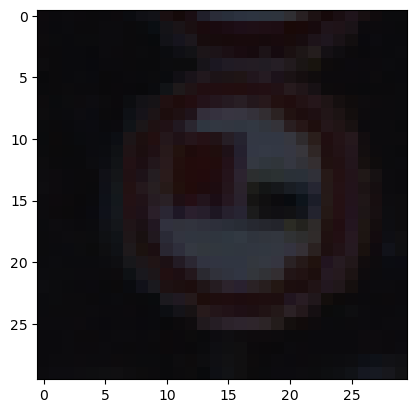

1/1 [==============================] - 0s 20ms/step
[[4.99113008e-11 1.04091082e-08 3.20110249e-09 2.91642754e-09
  1.25014481e-07 3.67707884e-07 4.29627341e-12 4.27448128e-07
  5.10977216e-08 2.38954217e-05 9.99468029e-01 7.13203763e-09
  4.95704589e-04 1.50831909e-07 6.18811328e-07 1.83833350e-07
  1.50250821e-06 7.68015241e-07 2.24871371e-07 1.28556650e-08
  1.07319366e-07 1.33498324e-09 5.86760762e-12 7.84484229e-08
  1.02196420e-08 8.98580552e-08 1.07042933e-06 9.77820491e-10
  5.32024369e-10 1.26105739e-08 9.66210514e-11 3.74576921e-08
  2.40966275e-10 2.55717254e-07 1.87611662e-11 3.28726287e-07
  7.55355067e-09 1.45977781e-08 4.23587299e-09 4.27068936e-10
  4.13483434e-07 2.08897322e-09 5.38663380e-06]]
0.999468
10
(11, 'No passing veh over 3.5 tons')


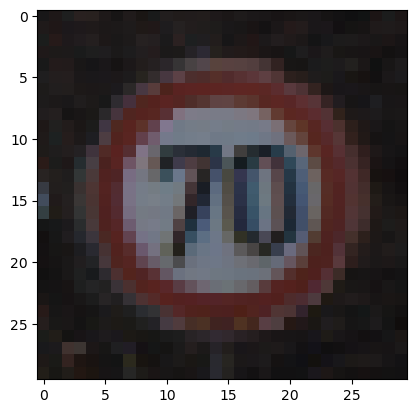

1/1 [==============================] - 0s 31ms/step
[[3.5268886e-08 1.3072689e-05 1.9870557e-10 1.0597441e-15 9.9998689e-01
  2.8576093e-09 3.2006275e-16 2.1690632e-09 1.6168128e-09 1.9328201e-14
  2.4661928e-12 9.6669025e-18 3.0768753e-12 7.3920613e-11 2.3412457e-12
  8.8109375e-10 3.6012540e-16 5.1905631e-13 3.4615907e-11 5.1729999e-17
  4.4448202e-15 1.6145489e-15 3.9261311e-16 4.4779778e-13 5.2494548e-13
  1.2050158e-12 9.0315498e-11 1.4446626e-16 1.4685857e-20 1.9380085e-16
  2.2166335e-20 7.6732217e-16 2.8273563e-17 3.6668649e-16 1.7042426e-16
  1.9335881e-13 1.9503598e-13 1.5859486e-17 1.4891067e-15 4.0068792e-14
  7.3214319e-13 1.5067717e-19 1.2212426e-16]]
0.9999869
4
(5, 'Speed limit (70km/h)')


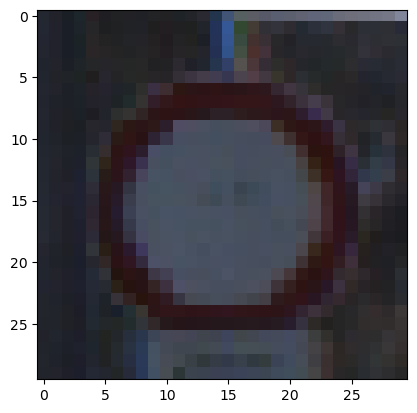

1/1 [==============================] - 0s 30ms/step
[[3.8268111e-10 4.5208610e-05 4.1550051e-05 1.6710443e-07 1.4731201e-03
  8.8694986e-05 7.9694255e-12 2.1748692e-06 2.3226207e-07 1.2410133e-05
  1.4064394e-06 3.5749220e-10 1.5734844e-06 1.3093420e-05 4.2614006e-06
  9.9831510e-01 1.4549518e-08 5.3653281e-07 4.1320011e-08 4.4891230e-11
  2.8927569e-11 1.9164435e-10 5.3582828e-12 1.0195116e-10 2.2820024e-09
  6.8404468e-08 1.0260558e-08 5.5387930e-11 3.9160165e-13 3.6573002e-09
  1.9005260e-13 4.6340442e-11 5.3693633e-08 3.5393739e-08 2.2847273e-10
  9.7588675e-09 2.0948949e-08 2.4244559e-10 6.8673373e-08 5.1427257e-10
  7.9869722e-08 1.9206105e-11 5.9836913e-11]]
0.9983151
15
(16, 'No vehicles')


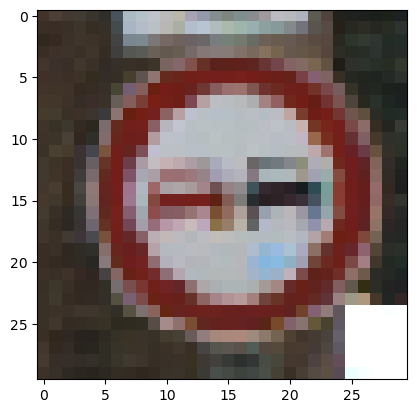

1/1 [==============================] - 0s 19ms/step
[[1.0663499e-26 1.0990980e-23 1.7861249e-21 8.1057919e-15 1.2683108e-23
  1.2910936e-22 1.0775416e-34 3.6199323e-26 6.4382346e-24 1.0000000e+00
  3.8624464e-12 5.1160230e-23 5.0709301e-14 1.8681862e-18 1.1797242e-20
  1.1619847e-11 6.0396219e-12 2.9608284e-21 1.6718577e-22 1.8662658e-15
  8.3795205e-13 3.0521181e-25 6.2638523e-33 9.7132285e-12 2.8399578e-22
  1.3316729e-19 4.3607233e-21 3.5235189e-23 3.8162781e-22 3.8437493e-20
  1.0464083e-24 8.3911125e-25 4.4965786e-19 7.5573369e-21 5.4770704e-20
  1.6714473e-17 9.7592972e-24 7.3269203e-28 5.4268784e-23 2.8860432e-31
  1.9917390e-20 4.9463156e-10 2.0230003e-16]]
1.0
9
(10, 'No passing')


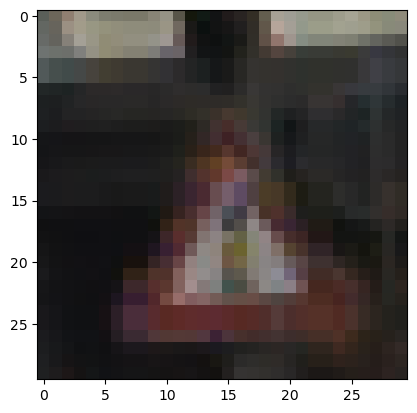

1/1 [==============================] - 0s 26ms/step
[[8.7781586e-09 6.3314144e-07 2.2206541e-07 2.9943426e-08 3.2496976e-07
  6.1662422e-07 8.6634708e-09 9.4892130e-08 3.1868427e-07 2.1303290e-06
  3.6809470e-05 3.1596150e-03 4.2709797e-03 8.4146814e-07 3.8642806e-06
  1.7615092e-08 4.7343487e-06 3.8515614e-06 2.7249131e-02 3.2915495e-04
  2.8161502e-02 1.6613028e-04 1.8143422e-05 1.6300080e-03 2.3608452e-01
  9.9542188e-03 6.3745224e-01 4.9815837e-02 6.2716496e-04 6.2269630e-04
  2.1205530e-04 1.7506655e-04 1.7573387e-07 1.7886526e-07 1.7754976e-08
  2.9437913e-07 3.9320145e-07 9.0270404e-09 7.3109522e-06 3.6194561e-10
  1.0902348e-07 9.2196011e-08 8.6172904e-06]]
0.63745224
26
(27, 'Traffic signals')


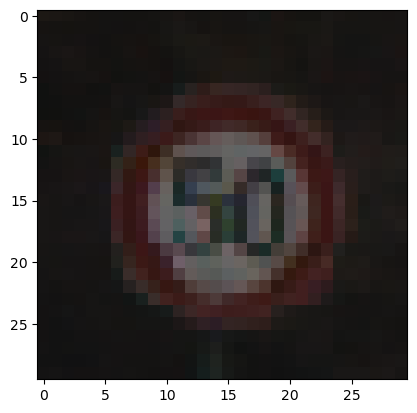

1/1 [==============================] - 0s 19ms/step
[[1.57533705e-07 2.26411619e-04 9.97736812e-01 1.05542867e-05
  9.62655008e-07 2.02493253e-03 2.79021754e-11 3.94994295e-08
  2.10435473e-08 1.21844493e-10 8.82392770e-12 5.07848832e-11
  2.27065686e-10 1.20126809e-09 8.29660923e-11 2.94982683e-09
  5.18860649e-12 4.54046488e-11 7.90888459e-13 3.97896299e-12
  2.70728454e-13 1.60839484e-12 8.58666945e-16 1.49094539e-11
  4.94230091e-13 5.19462195e-10 1.19164954e-12 1.66134537e-11
  1.30780396e-14 1.98945149e-11 4.76649538e-15 1.71116274e-10
  5.68574376e-13 1.30155424e-12 9.74123993e-13 5.79837480e-12
  5.69616750e-12 8.44176812e-12 1.08537880e-10 9.76157699e-15
  1.22560415e-08 8.00412322e-14 1.32682968e-13]]
0.9977368
2
(3, 'Speed limit (50km/h)')


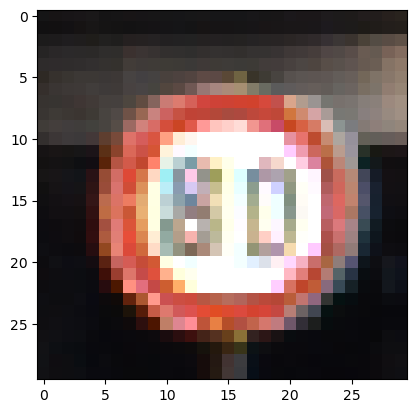

1/1 [==============================] - 0s 26ms/step
[[1.48402338e-04 9.46733728e-02 1.00472523e-02 3.81681428e-04
  5.67341805e-04 8.91684055e-01 4.74994295e-06 1.56190805e-03
  7.04354665e-04 2.36442133e-06 1.38658481e-06 3.79176548e-08
  3.56096971e-05 1.72426394e-06 5.10739085e-07 1.30941307e-05
  1.66191472e-04 4.80402029e-09 2.84957968e-09 5.66584168e-10
  3.38590297e-07 2.48890575e-09 8.12522358e-13 2.28850645e-08
  8.11673284e-10 6.40482298e-08 1.35514542e-08 1.54477417e-10
  5.47413359e-09 5.91221720e-08 5.35075095e-10 1.25838033e-08
  1.09665450e-07 1.99874406e-09 1.27728299e-08 3.14607837e-06
  1.11144971e-07 1.20261365e-08 2.71906970e-07 5.10255838e-10
  1.32036064e-06 2.89322855e-09 4.42817480e-07]]
0.89168406
5
(6, 'Speed limit (80km/h)')


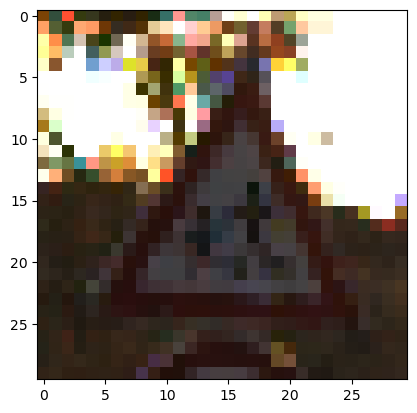

1/1 [==============================] - 0s 22ms/step
[[5.7621094e-08 6.7795924e-07 9.9221222e-07 1.1142797e-05 1.5040536e-08
  1.4954308e-06 4.6440185e-09 5.9783467e-08 9.6367830e-07 5.9381033e-05
  1.2059311e-06 2.5075504e-03 4.2290929e-05 6.4236424e-06 2.3528932e-05
  7.2775487e-07 1.3276127e-06 2.3127639e-07 2.1373532e-06 2.0861835e-06
  3.5301023e-03 1.2142298e-04 3.6035826e-07 6.7097688e-04 1.3165954e-04
  1.1260343e-03 4.2217871e-05 1.4696462e-05 7.1113592e-01 6.1878640e-02
  2.1865228e-01 7.2458306e-07 1.4503885e-05 1.1573925e-06 9.7622592e-07
  1.3582779e-05 2.0952774e-08 5.7806329e-09 5.0215203e-07 7.4631544e-08
  5.6175753e-07 2.4953218e-07 9.7393274e-07]]
0.7111359
28
(29, 'Children crossing')


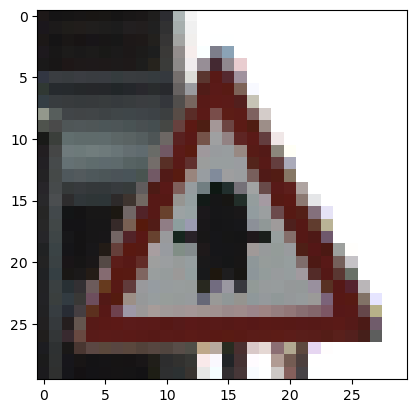

1/1 [==============================] - 0s 25ms/step
[[0.0000000e+00 7.8034478e-37 1.1918162e-33 4.6329682e-33 0.0000000e+00
  6.0802797e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0436878e-27 0.0000000e+00 2.7297011e-38
  0.0000000e+00 6.0524110e-38 0.0000000e+00 3.8389192e-32 6.0277892e-35
  5.5786100e-32 7.5244791e-23 0.0000000e+00 6.3234046e-29 3.0812111e-33
  2.9425655e-28 3.1287303e-33 2.3835472e-18 6.4943826e-22 1.4080412e-26
  2.4743485e-19 2.3189253e-35 1.5030966e-31 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 8.5159671e-34 0.0000000e+00]]
1.0
11
(12, 'Right-of-way at intersection')


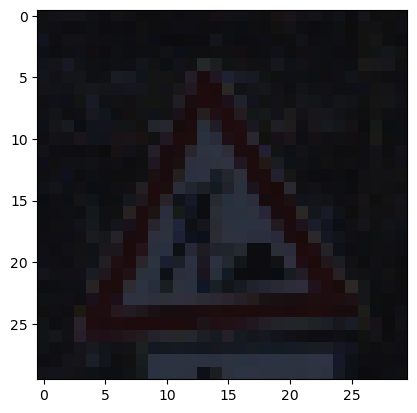

1/1 [==============================] - 0s 26ms/step
[[5.4881355e-19 1.4946334e-13 2.2901207e-13 7.3841454e-13 2.6138363e-15
  6.5262899e-12 1.2224580e-13 2.4894596e-18 4.7929290e-16 1.1122707e-14
  1.8832656e-14 7.4106286e-13 8.1416776e-11 3.0622469e-13 5.0433252e-13
  2.1754182e-16 2.3788608e-17 3.3405630e-13 2.3910318e-11 3.9161488e-14
  1.8326334e-07 6.2911655e-13 1.3328985e-10 1.3637512e-12 1.6528853e-09
  9.9999976e-01 6.6485613e-09 4.5032513e-13 1.8494865e-11 5.8532929e-10
  1.9291582e-14 7.9459342e-11 4.4694464e-15 4.6551673e-17 1.2940958e-15
  9.4410922e-14 6.4511645e-09 9.7177760e-21 1.2843221e-14 4.1016859e-18
  3.8546789e-17 9.1379039e-18 1.2394834e-15]]
0.99999976
25
(26, 'Road work')


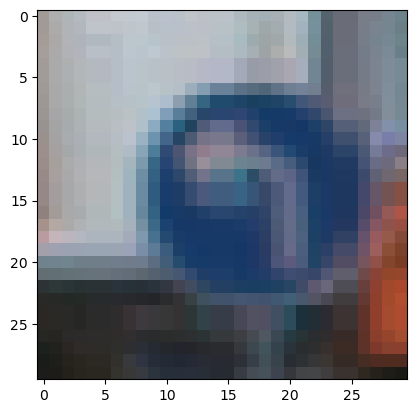

1/1 [==============================] - 0s 27ms/step
[[1.57254990e-11 4.82882623e-10 5.47521637e-08 1.68156225e-06
  5.54075125e-15 2.24410769e-06 1.53403395e-15 5.79120973e-10
  3.76371077e-08 3.47134571e-10 1.16723419e-11 5.22662846e-09
  1.55807134e-09 5.24856603e-09 6.95301108e-12 5.27862606e-12
  2.70241165e-12 3.90857345e-16 1.60571782e-14 3.72553855e-14
  2.29488775e-10 5.20319177e-10 1.79863162e-17 4.85732343e-10
  6.86835258e-15 4.51522066e-12 8.20112207e-12 3.30856693e-14
  2.45491938e-09 4.84805184e-07 2.56022901e-07 2.76372061e-14
  8.26191058e-13 2.17408065e-08 9.99476135e-01 3.35436402e-04
  4.01702422e-08 1.13648736e-10 8.99680745e-05 2.26965714e-14
  9.35239805e-05 2.30749203e-15 7.48974016e-13]]
0.99947613
34
(35, 'Turn left ahead')


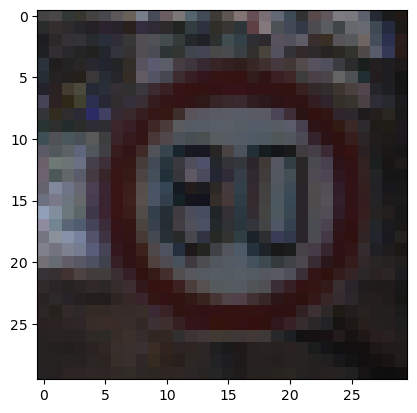

1/1 [==============================] - 0s 27ms/step
[[3.5628818e-14 1.0143757e-07 3.3446115e-05 1.7008664e-04 3.7408436e-12
  9.9979633e-01 7.8865137e-10 3.6703335e-10 7.2575701e-14 4.6667561e-16
  1.9667334e-13 7.0721078e-14 2.7278735e-13 2.2528952e-15 2.5135752e-14
  7.8814600e-14 1.2341358e-12 1.7275159e-19 1.4453668e-18 1.8529715e-20
  7.5888263e-18 8.7560120e-16 1.3322068e-23 2.8290179e-17 8.5632173e-20
  3.9306466e-14 1.6918166e-19 1.6677609e-20 2.0045577e-19 3.0113361e-17
  3.5499640e-19 9.9136235e-14 2.9388660e-16 4.0614810e-17 3.5012405e-18
  2.1543793e-14 2.4056151e-16 4.9766574e-21 6.7552932e-15 4.4582884e-22
  4.6314450e-13 4.6419587e-21 3.2783293e-16]]
0.99979633
5
(6, 'Speed limit (80km/h)')


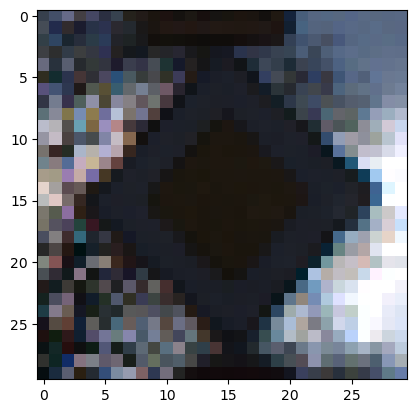

1/1 [==============================] - 0s 26ms/step
[[6.4715022e-10 3.9910134e-08 1.1551827e-07 1.5199457e-07 2.0764388e-08
  4.7233643e-06 1.4636233e-12 7.7908008e-10 1.3852534e-07 1.7038637e-08
  2.1614438e-04 2.3302608e-08 9.9974900e-01 5.6918552e-06 2.3398810e-08
  7.6934960e-08 1.0670802e-09 2.0554375e-05 1.3325197e-08 3.7137837e-10
  2.5444310e-08 2.9589756e-08 7.3033211e-12 8.4112974e-09 1.8581522e-10
  1.2336283e-06 4.8063674e-07 3.2393002e-10 1.9396906e-10 9.5816392e-07
  1.8239579e-10 1.8196347e-07 1.1804142e-08 5.2373597e-08 2.2823253e-10
  4.0891578e-08 3.7868624e-08 5.1613031e-10 1.3398527e-07 7.6786778e-11
  6.4576739e-08 5.2339466e-11 1.9202040e-09]]
0.999749
12
(13, 'Priority road')


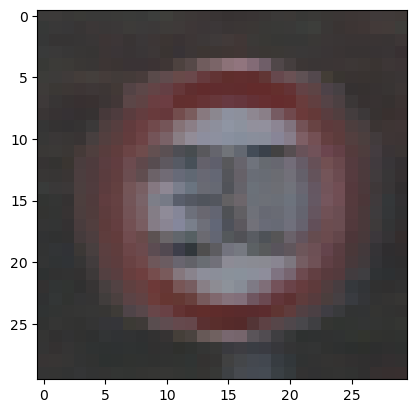

1/1 [==============================] - 0s 19ms/step
[[2.5414804e-04 9.9838388e-01 5.1855942e-04 7.1466486e-09 6.2684026e-06
  7.8844215e-04 1.1304794e-09 1.3855048e-05 3.4894954e-05 6.9527251e-13
  1.3069031e-11 2.7774576e-11 1.1960749e-10 2.3564876e-11 2.0422894e-11
  2.8925093e-11 2.1119389e-11 8.3956175e-12 2.1255402e-12 1.0895886e-15
  2.0757319e-12 2.2381686e-12 1.7229284e-15 1.5176195e-11 3.4605253e-12
  6.7113151e-12 9.2046518e-12 2.5834009e-14 2.4484345e-11 4.1953975e-12
  1.0811600e-13 3.6212235e-11 3.8101063e-13 1.8973987e-15 1.4250875e-14
  8.4874046e-13 2.7291914e-15 1.9219656e-12 3.5118241e-12 3.5618494e-13
  2.4116606e-08 4.1609985e-14 2.4300445e-10]]
0.9983839
1
(2, 'Speed limit (30km/h)')


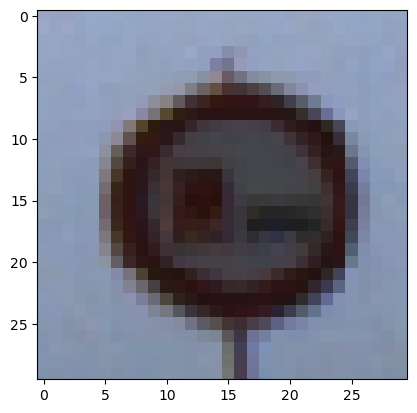

1/1 [==============================] - 0s 16ms/step
[[1.2417794e-11 1.1349241e-08 3.9367723e-08 1.1984200e-07 3.9700410e-08
  2.1483761e-06 3.0745794e-13 7.7766441e-07 3.3080754e-09 6.1758247e-04
  9.9936134e-01 7.6978129e-10 3.6667660e-07 2.6162407e-08 1.0553671e-07
  3.0748910e-07 1.2247297e-05 9.6178909e-10 6.7562494e-10 6.5000122e-10
  2.6939233e-09 2.3702870e-10 2.1071999e-14 2.9359846e-09 6.3157368e-11
  5.2806137e-10 1.6396251e-10 3.6992728e-11 3.9440617e-12 2.0874030e-10
  1.9462802e-12 6.9803080e-10 1.9381525e-12 4.7637219e-08 1.0961257e-11
  2.5679328e-09 1.9140123e-09 2.8119694e-13 2.4513472e-10 6.6389570e-13
  1.5657299e-09 3.0026270e-11 4.8863926e-06]]
0.99936134
10
(11, 'No passing veh over 3.5 tons')


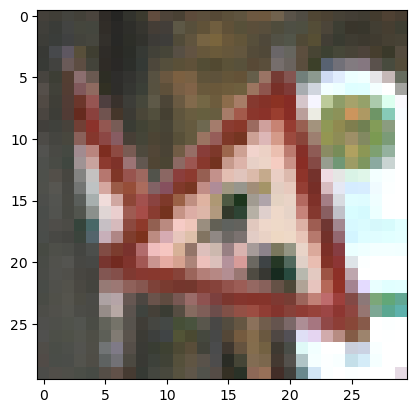

1/1 [==============================] - 0s 24ms/step
[[1.96194311e-14 2.49131449e-09 8.93916052e-10 3.97241268e-11
  6.10569646e-13 1.11593301e-09 8.95635476e-12 6.11651355e-13
  2.43942914e-14 1.87529614e-12 1.15375903e-13 5.11226006e-07
  1.05402911e-07 1.13796917e-12 5.12293097e-10 3.71765379e-12
  1.65101830e-15 4.93327289e-11 1.12523093e-08 4.66601627e-12
  8.90326675e-08 2.33279734e-05 1.27195801e-06 2.04098392e-08
  3.83183942e-05 9.99801576e-01 2.86072233e-09 2.60458819e-07
  4.12377545e-07 1.31017965e-04 1.07600364e-07 3.01194359e-06
  1.49138601e-11 9.23287088e-16 2.08138519e-12 1.51608449e-13
  1.90905611e-10 6.49096213e-15 6.87573826e-12 1.85076763e-15
  1.10031999e-13 1.22729436e-13 3.95649471e-15]]
0.9998016
25
(26, 'Road work')


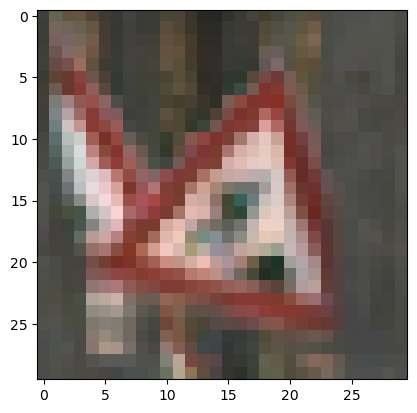

1/1 [==============================] - 0s 22ms/step
[[1.8838946e-17 6.1724778e-11 2.2019610e-11 3.3073915e-13 9.1715118e-15
  2.3774432e-11 1.7896165e-13 3.7245401e-14 1.2228011e-16 8.7993584e-14
  1.2386519e-14 2.9198023e-07 3.4823742e-08 2.1309726e-14 3.0610698e-11
  1.7828424e-14 2.7717747e-17 4.0939517e-12 5.0166826e-09 3.8017056e-13
  6.2764393e-08 1.9698377e-06 1.2760574e-07 5.1039812e-09 2.1756779e-04
  9.9973637e-01 9.0298602e-10 3.0159690e-08 7.8431626e-08 4.3224743e-05
  1.0759539e-07 8.3841257e-08 1.9547717e-13 8.9095965e-16 2.5366682e-13
  1.2550475e-13 2.5713400e-11 8.3163871e-16 2.4577465e-13 6.4814061e-16
  9.0496180e-14 4.2923439e-14 1.4492056e-14]]
0.99973637
25
(26, 'Road work')


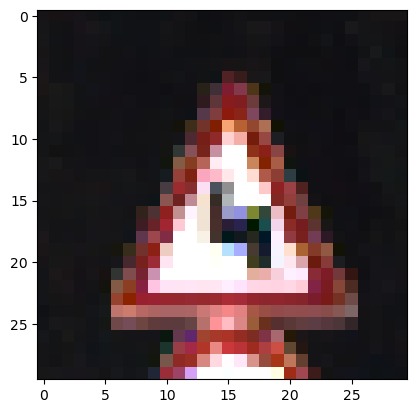

1/1 [==============================] - 0s 24ms/step
[[3.36325786e-22 1.93607095e-21 7.31251508e-20 1.19794336e-24
  5.07894147e-23 4.79555685e-19 5.79733380e-35 4.56128917e-22
  1.15948985e-22 9.98356293e-18 1.93641565e-16 1.50987862e-08
  2.09604920e-17 8.50834311e-25 1.69942528e-20 2.75883831e-28
  2.20057969e-27 1.36112085e-21 1.16631315e-21 1.12482521e-05
  1.48543636e-18 9.99988675e-01 1.39646394e-21 1.71694037e-09
  2.30614139e-14 8.84412606e-13 1.60809826e-22 1.73487526e-12
  5.17090056e-16 9.61179313e-12 5.56917179e-09 1.05357065e-08
  1.66536479e-30 1.18152758e-17 2.39162551e-26 3.22598011e-25
  3.84426884e-32 5.03941425e-24 4.48774809e-29 6.04359125e-18
  3.94891420e-21 4.03691585e-23 4.68013386e-24]]
0.9999887
21
(22, 'Double curve')


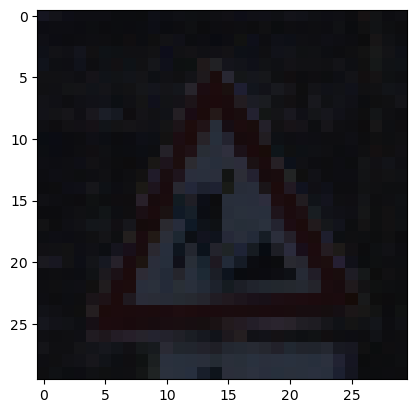

1/1 [==============================] - 0s 25ms/step
[[7.96666333e-19 6.71741959e-13 1.10775397e-12 1.12375578e-11
  7.49591717e-15 8.02063901e-11 2.07343596e-13 2.54038283e-17
  1.53397680e-16 1.66309181e-15 7.05746751e-15 1.34210937e-12
  4.11598047e-11 1.17313418e-12 2.58828495e-13 1.02162327e-15
  5.98554302e-18 3.86460395e-13 2.66189891e-12 6.55526167e-15
  4.07374667e-09 3.35920354e-12 1.01946472e-11 6.26024894e-13
  3.53109253e-09 1.00000000e+00 9.86867810e-11 5.99401225e-13
  2.85695577e-12 7.95344512e-10 4.37168138e-14 1.21223920e-10
  4.18963375e-15 2.69238621e-17 8.61380415e-15 1.03515795e-14
  4.59004668e-10 1.40707897e-20 5.24997187e-14 3.04433666e-19
  2.56056124e-17 9.52122274e-18 1.48767276e-15]]
1.0
25
(26, 'Road work')


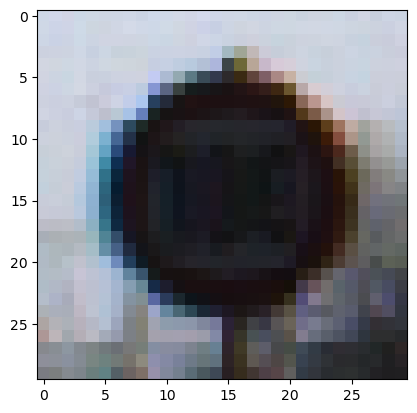

1/1 [==============================] - 0s 27ms/step
[[7.77076639e-05 1.64132789e-02 4.02797721e-02 3.42590996e-04
  3.05265710e-02 1.57463938e-01 8.45036880e-07 8.11987817e-02
  6.72448039e-01 6.40668659e-05 7.87288445e-05 1.84023847e-07
  1.23186396e-06 3.31073970e-05 4.47225539e-05 4.11086658e-04
  5.57957355e-06 9.17593861e-05 7.63673256e-07 1.25172789e-07
  6.40944222e-07 3.98292315e-08 4.22881175e-10 6.45579519e-07
  2.23006552e-07 8.17283762e-07 3.89237039e-06 2.07694253e-08
  5.49907897e-09 4.74963677e-08 5.85336002e-09 4.67012939e-07
  8.25795823e-08 1.86174873e-06 1.05965135e-07 3.15409511e-06
  1.48395393e-05 6.53940759e-08 2.48264018e-06 5.74423353e-08
  4.86799487e-04 2.39818521e-09 8.74931345e-07]]
0.67244804
8
(9, 'Speed limit (120km/h)')


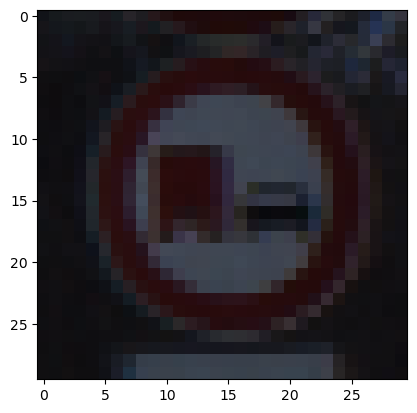

1/1 [==============================] - 0s 25ms/step
[[4.1744159e-22 8.9405102e-17 5.1525289e-16 1.8567079e-15 7.4838809e-17
  1.0152398e-12 2.4931793e-23 5.3671087e-13 1.0625754e-15 5.6609744e-09
  1.0000000e+00 1.6889982e-15 2.8171918e-10 3.7136936e-15 4.1248213e-15
  6.3142150e-16 2.4330347e-11 8.0456808e-17 6.8413135e-18 9.2394208e-17
  1.9783645e-14 4.4072927e-16 5.3139756e-25 8.0824799e-15 1.0683290e-18
  3.2061428e-17 7.2635145e-16 1.5022518e-19 5.3817024e-18 1.1866542e-17
  1.3823510e-19 1.6141390e-15 1.5765864e-21 6.7672227e-14 1.4172164e-21
  3.3717218e-15 1.1026414e-17 1.7285527e-20 2.4752724e-20 2.1381775e-20
  2.0639967e-14 3.3660494e-18 1.5136440e-08]]
1.0
10
(11, 'No passing veh over 3.5 tons')


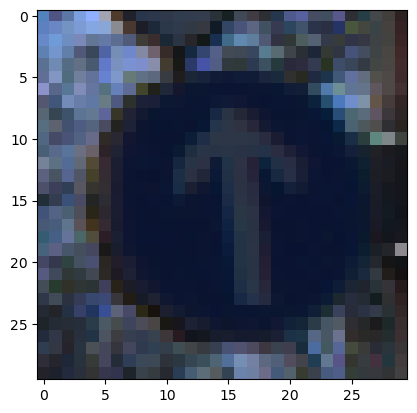

1/1 [==============================] - 0s 23ms/step
[[3.49254117e-17 2.29378936e-15 9.32537535e-16 5.09448907e-12
  4.57498476e-17 2.48213939e-13 3.56230501e-19 3.99858364e-18
  5.81247561e-16 5.68400416e-13 8.30230389e-14 9.25626847e-15
  1.66520478e-11 3.80455693e-12 3.21919835e-17 1.38995998e-14
  5.50034532e-14 1.02590655e-19 2.38513377e-17 1.50359008e-18
  9.37394354e-14 3.18802356e-17 3.92148633e-24 9.53737857e-17
  7.02091258e-20 6.26173977e-16 2.26203926e-14 3.97249030e-20
  8.31820669e-13 3.46512424e-13 9.70454780e-17 3.48079952e-23
  1.11119508e-14 4.60253835e-09 2.67657538e-06 9.99997377e-01
  1.03420562e-11 7.00364723e-12 6.42978393e-10 5.97180357e-16
  2.63192801e-09 5.95983605e-15 1.05079791e-16]]
0.9999974
35
(36, 'Ahead only')


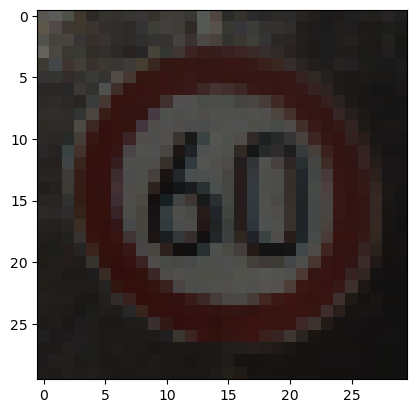

1/1 [==============================] - 0s 31ms/step
[[4.42426540e-09 8.70127963e-07 1.69320901e-05 9.98635828e-01
  3.11781351e-10 1.34498125e-03 3.35696569e-07 7.98514255e-10
  3.08353143e-09 2.63196642e-09 4.25195923e-09 4.19149558e-07
  2.74641430e-08 5.37319356e-10 4.91937213e-10 7.08840986e-10
  2.28906174e-07 6.93173210e-12 1.46927305e-12 3.68366275e-12
  9.54880619e-09 1.91862215e-09 6.06774559e-14 4.53607418e-09
  1.28370552e-11 1.00415214e-07 8.01325326e-12 7.16370106e-12
  9.47334033e-09 5.40106555e-08 5.77773029e-09 2.49669245e-08
  3.98804509e-08 3.39913479e-11 9.11494169e-09 1.57553270e-09
  2.55716059e-10 1.04162765e-13 3.07677723e-08 3.43129384e-15
  6.07274009e-09 7.10516757e-10 5.30907762e-09]]
0.9986358
3
(4, 'Speed limit (60km/h)')


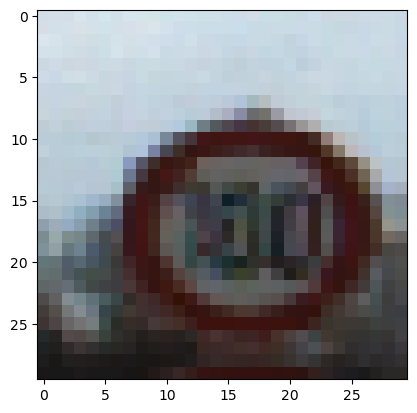

1/1 [==============================] - 0s 35ms/step
[[1.41276723e-06 6.20565916e-05 3.86043172e-03 3.13916098e-05
  4.03608836e-04 1.71735939e-02 6.90180215e-08 8.85250747e-01
  9.29365978e-02 1.50753249e-05 8.32196019e-05 6.05929608e-06
  1.58856824e-06 6.40456847e-06 1.30159094e-07 8.36966319e-06
  2.56169665e-06 1.41374102e-07 2.12823217e-08 1.11133295e-06
  5.34388164e-07 5.03059855e-05 1.06449962e-11 1.32792475e-05
  6.33071431e-06 3.87712089e-06 1.39250744e-06 4.18528600e-07
  1.27855690e-08 1.00728755e-06 7.28908162e-06 2.54198585e-05
  6.06084349e-10 7.20629805e-06 4.56589468e-08 1.03652191e-07
  3.25576224e-08 7.94845345e-09 1.31321386e-07 1.99562700e-09
  3.54595832e-05 3.20143217e-11 2.50729022e-06]]
0.88525075
7
(8, 'Speed limit (100km/h)')


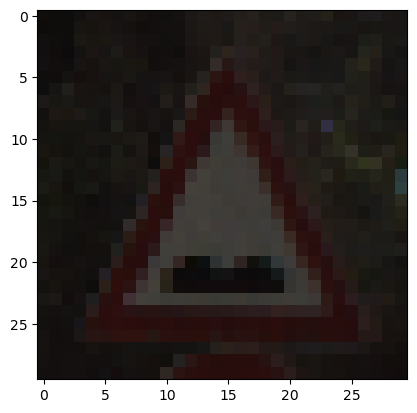

1/1 [==============================] - 0s 26ms/step
[[1.07434250e-09 5.39186544e-08 4.30520064e-09 2.16222418e-09
  1.60446045e-10 7.38069028e-09 7.67047710e-12 7.56825921e-11
  1.30774591e-09 2.39350095e-09 8.51121129e-09 5.95701479e-08
  7.16261113e-08 5.49123813e-09 3.54807562e-05 1.08070026e-07
  2.42513284e-11 3.76778485e-06 5.88632247e-06 2.17947047e-08
  2.36725327e-06 5.02458761e-06 9.98346686e-01 1.39813419e-05
  9.07745232e-07 4.79311711e-05 3.64713583e-06 4.59478535e-08
  4.62573581e-07 1.43266388e-03 5.68850965e-07 1.00120509e-04
  1.11884897e-10 2.70622857e-09 4.35275993e-09 9.51284718e-10
  8.90478269e-09 7.63970665e-10 6.12745339e-08 2.38793785e-09
  7.50273385e-11 2.12299067e-11 2.23987148e-11]]
0.9983467
22
(23, 'Bumpy road')


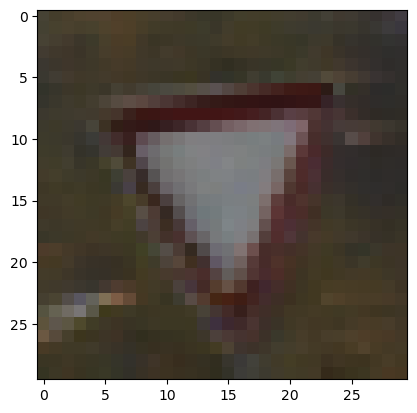

1/1 [==============================] - 0s 31ms/step
[[2.17973279e-21 9.76474151e-15 2.25378215e-13 5.97976936e-14
  2.78124386e-14 2.26979012e-14 4.88669453e-25 1.68246608e-21
  7.51680860e-18 7.36111950e-15 1.02831367e-14 1.00896816e-19
  2.74968137e-17 1.00000000e+00 1.22631427e-09 1.48337120e-08
  7.44135647e-23 1.13447527e-13 1.09296350e-17 3.46567619e-24
  2.33192648e-23 1.33851717e-20 8.93986971e-23 1.75822391e-23
  2.45899521e-24 8.29582692e-16 1.13056472e-18 5.48063362e-24
  1.00267029e-22 1.24475148e-17 8.83748978e-26 7.65755231e-26
  2.23244980e-17 4.25412967e-17 2.71168044e-18 1.39755903e-17
  4.92247056e-16 5.21000424e-24 1.24394329e-19 1.40519292e-17
  2.05683112e-19 1.13482167e-24 3.41885450e-22]]
1.0
13
(14, 'Yield')


In [30]:
from tensorflow.keras.preprocessing import image

dir_path = 'C:\\AI(ml&dl)\\DATASETS\\Taffic_signals_rec\\code\\Pedict_set'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'\\'+i,target_size = (30,30))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    
    images = np.vstack([x])
    result = model.predict(images)
    print(result)
    
    fresult = np.max(result)
    print(fresult)
    labelR = label[result.argmax()]
    print(result.argmax())
    print(labelR)